In [7]:
# Importaciones de las librerias necesarias
# %pip install xlrd
# %pip install pandas
# %pip install openpyxl

import pandas as pd


file_path_Datos = r'raw_data\Perfil_EmpresasImpo_2022_WEB.xlsx'

file_path = r'raw_data'

columnas_a_leer = ['Cod_Provincia', 'Provincia_Ubicacion', 'Valor_FOB_USD', 'Valor_CIF_USD', 'Capitulo_desc_SA']

#Creación del dataframe con todos los datos

df = pd.read_excel(file_path_Datos, usecols=columnas_a_leer)

#Creación de dataframe sumando todos los costos de importación por provincia 
df_grouped = df.groupby('Provincia_Ubicacion')['Valor_CIF_USD'].sum().reset_index()


# Ahora 'Valor_CIF_USD' es una columna en 'df_grouped' y podemos aplicar el formato
df_grouped['Valor_CIF_USD'] = df_grouped['Valor_CIF_USD'].apply(lambda x: '{:.2f}'.format(x))

#print(df_grouped)


In [8]:
import pandas as pd


# Agrupación por Provincia y Descripción de Productos
df_grouped = df.groupby(['Provincia_Ubicacion', 'Capitulo_desc_SA'])['Valor_CIF_USD'].sum().reset_index()

# Crear DataFrames separados para cada provincia
provincias = df['Provincia_Ubicacion'].unique()  # Lista de provincias únicas

df_grouped_sorted = df_grouped.sort_values('Valor_CIF_USD', ascending=False)

# Crear un diccionario para almacenar los DataFrames por provincia
dataframes_por_provincia = {}

for provincia in provincias:
    # Filtrar los datos solo para la provincia actual
    df_provincia_actual = df_grouped[df_grouped['Provincia_Ubicacion'] == provincia]
    
    # Asignar un nombre específico al DataFrame (usando el nombre de la provincia)
    dataframes_por_provincia[provincia] = df_provincia_actual

# Imprimir los DataFrames resultantes
# for provincia, df_provincia in dataframes_por_provincia.keys():
#     print(f"DataFrame para {provincia}:")
#     print(df_provincia)
#     print("\n")

# for provincia in dataframes_por_provincia:
#     print(f"DataFrame para {provincia}")
#     #print("\n")

C:\Users\enman\AppData\Local\Temp\ipykernel_23228\2400967921.py:39: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


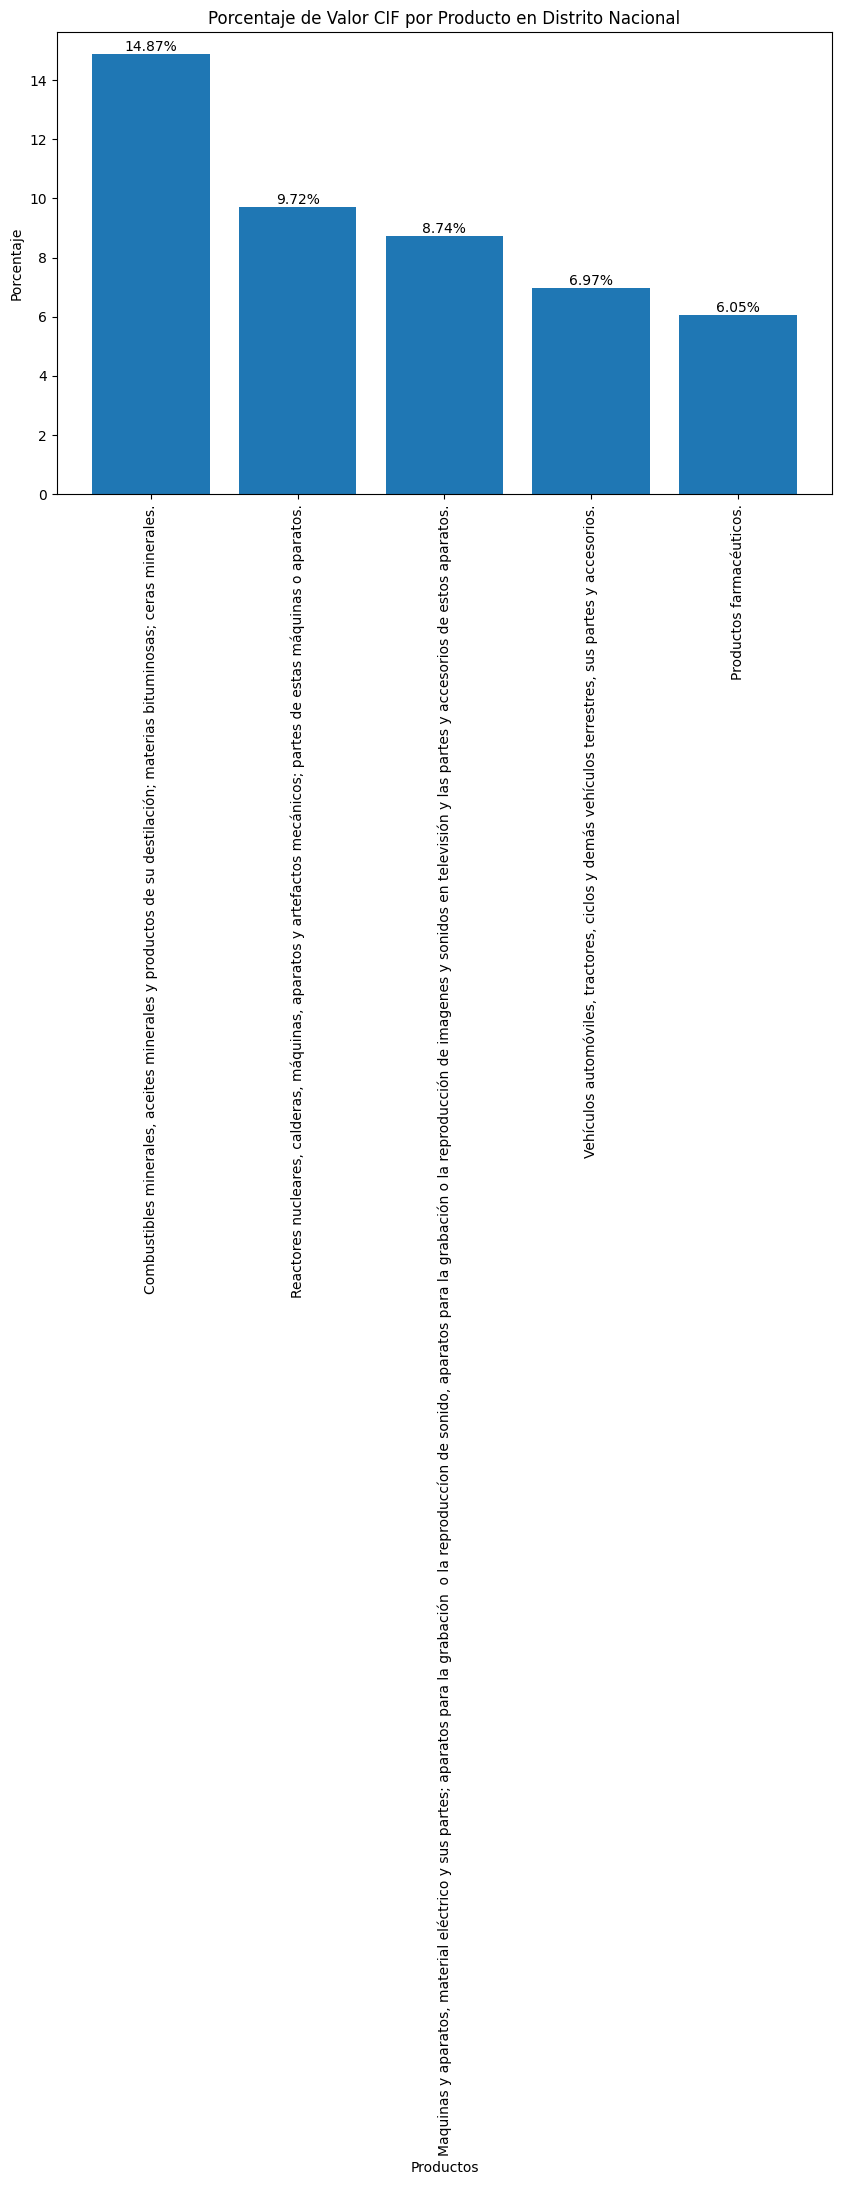

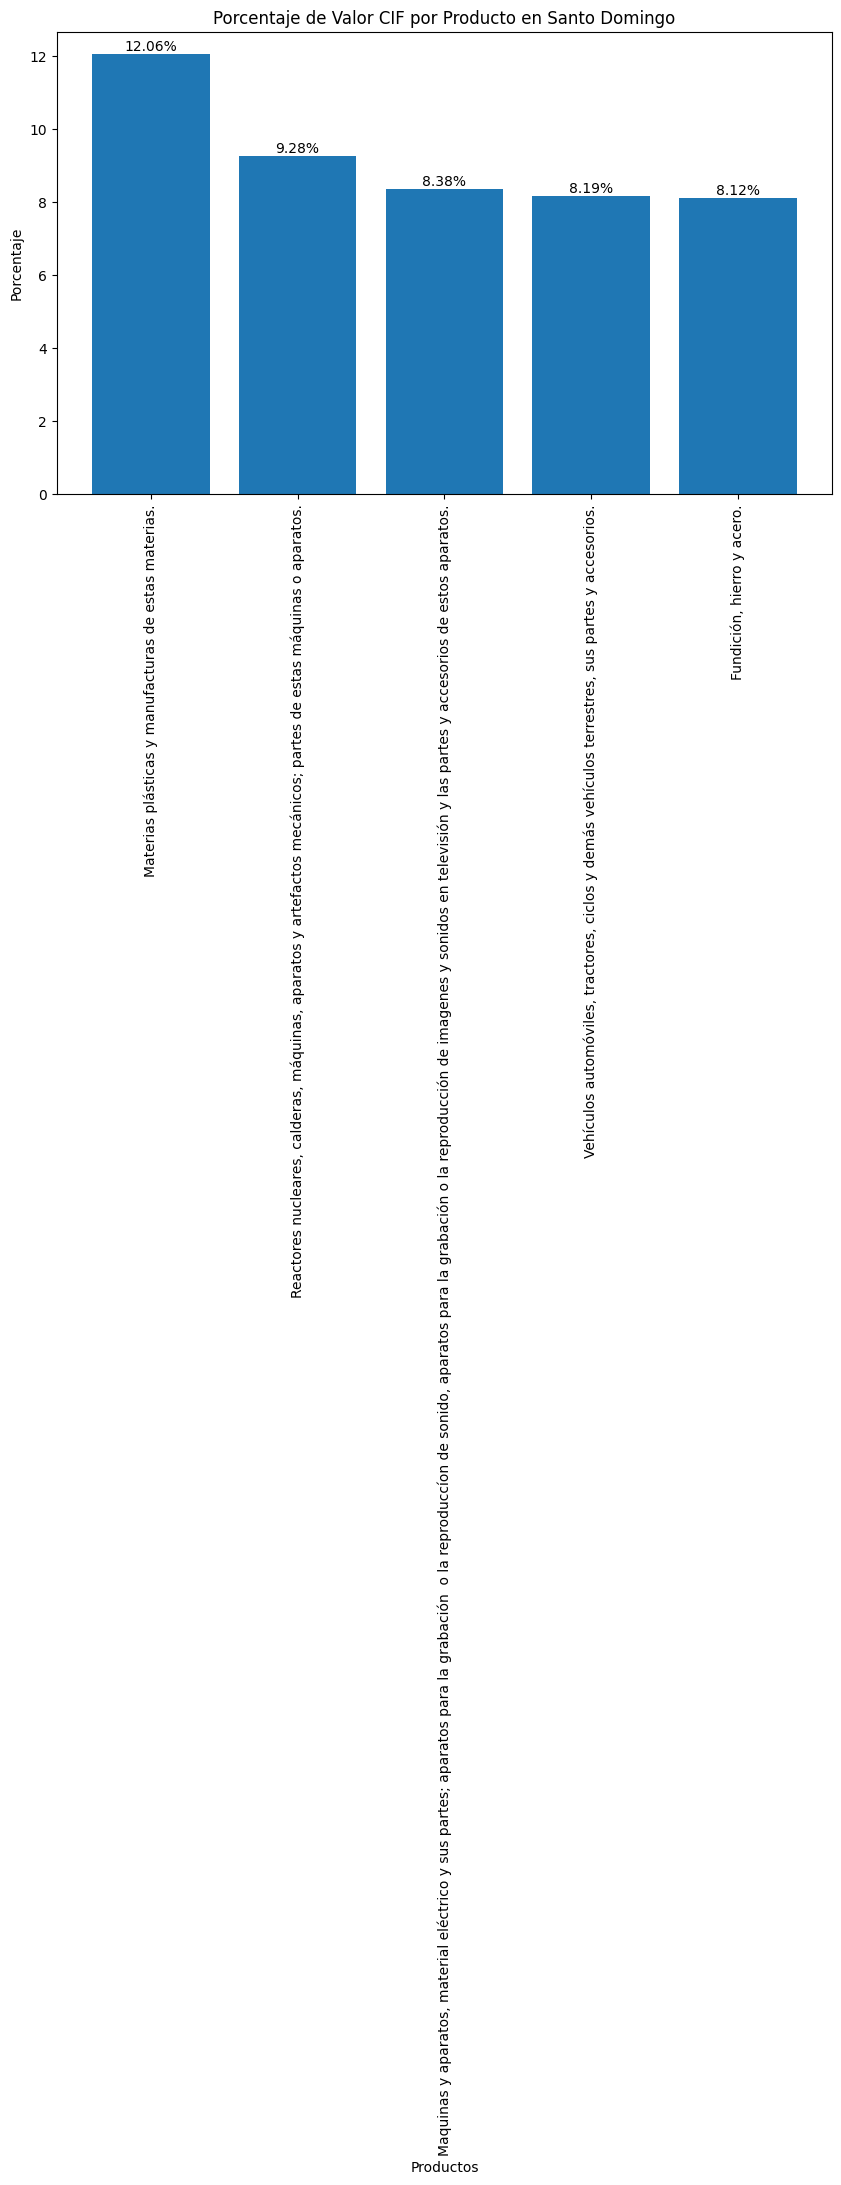

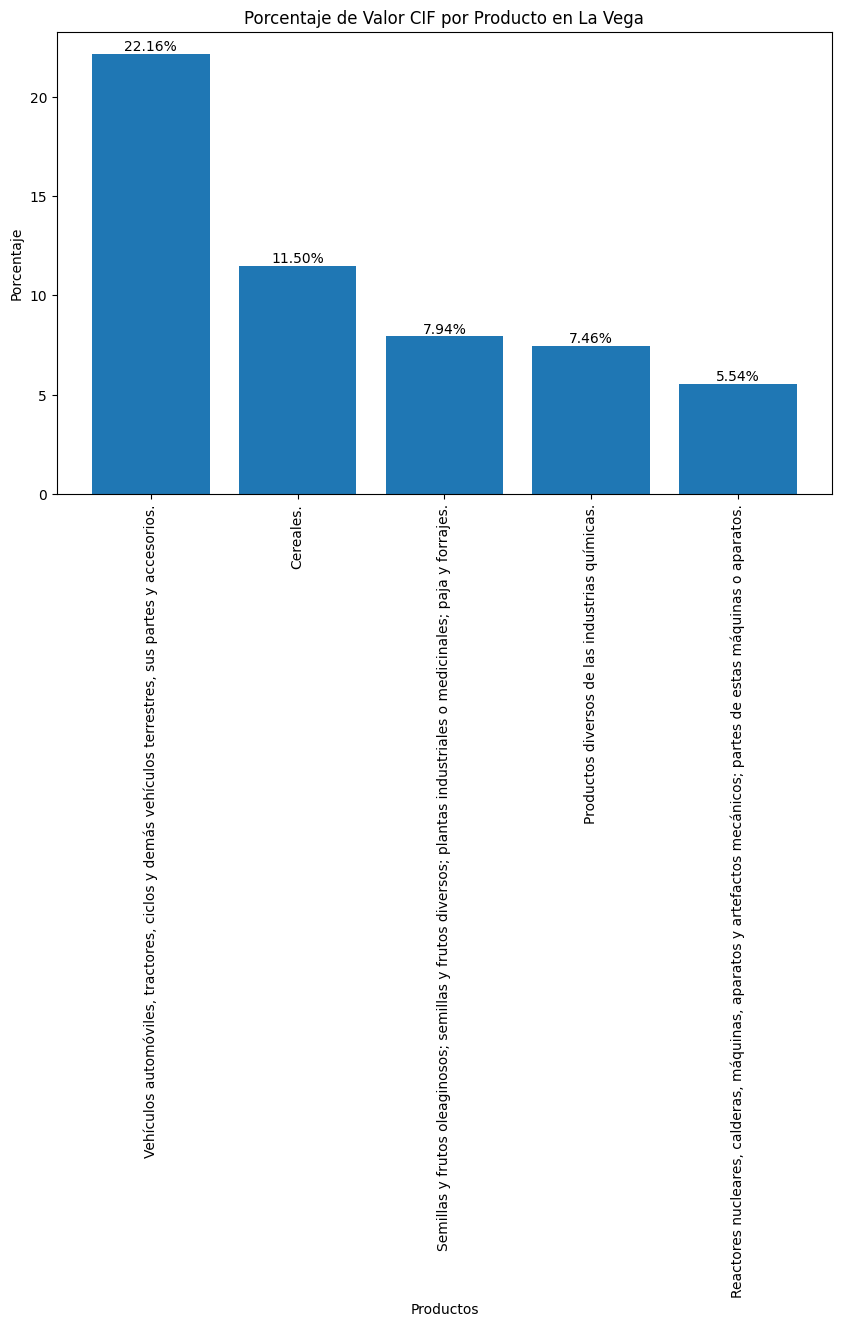

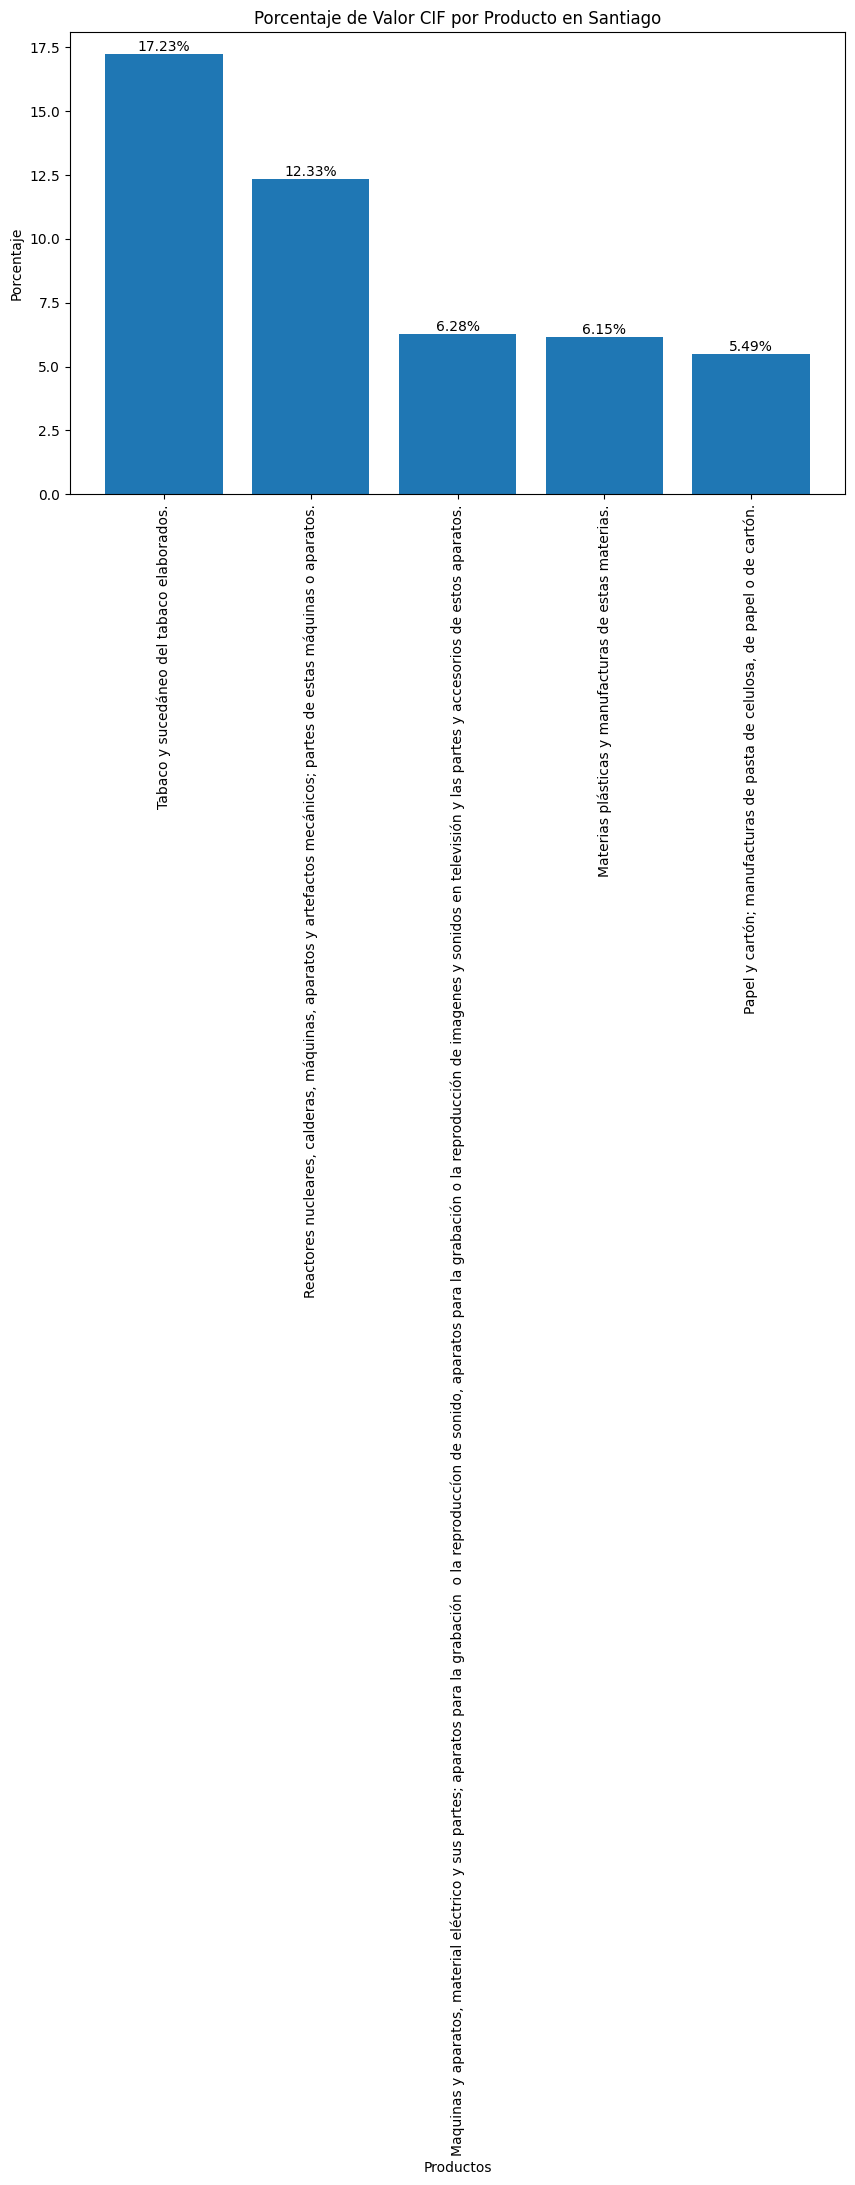

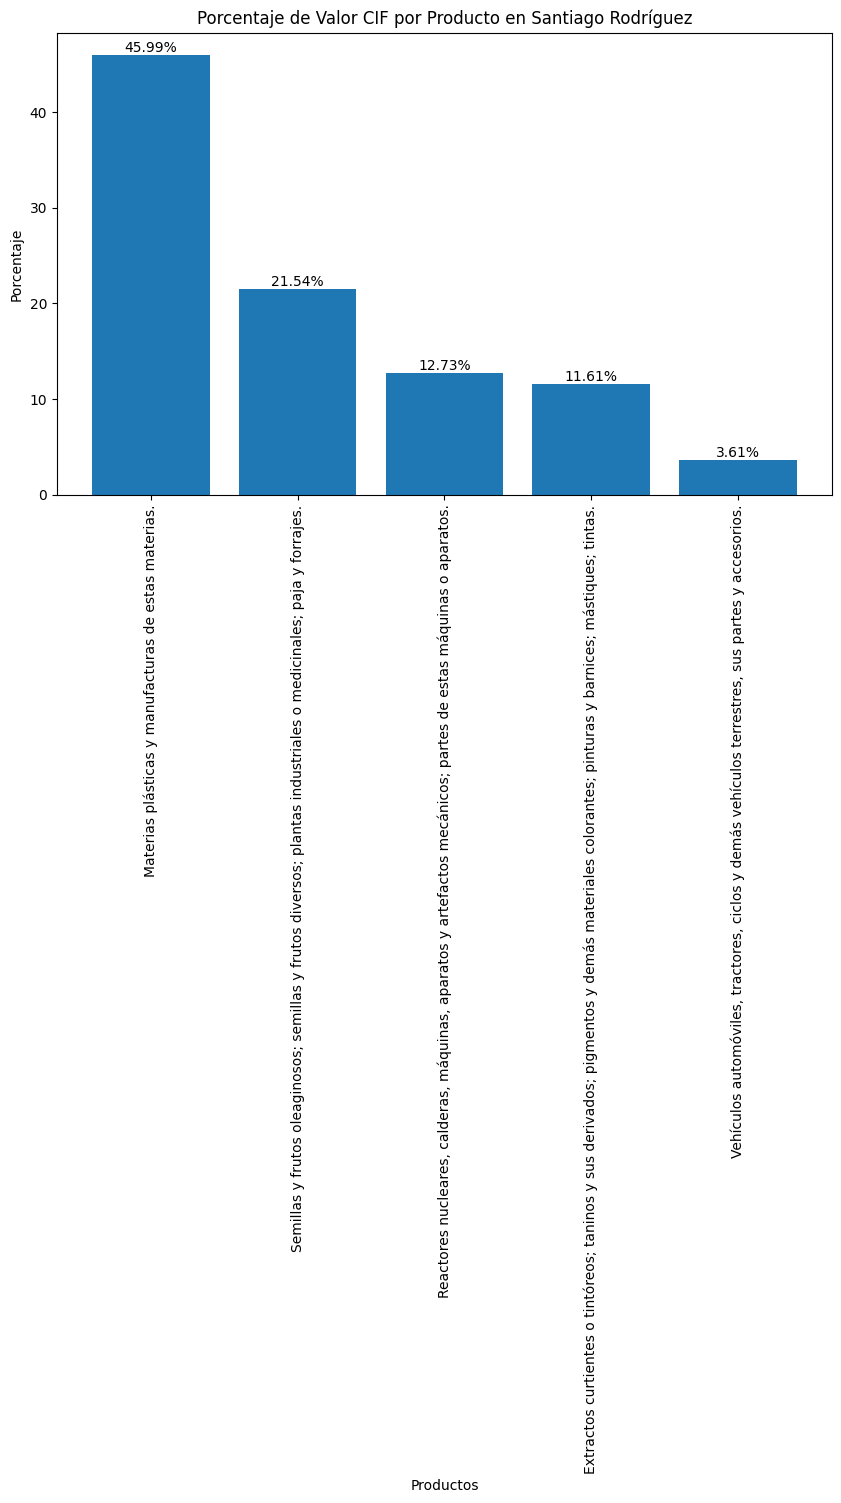

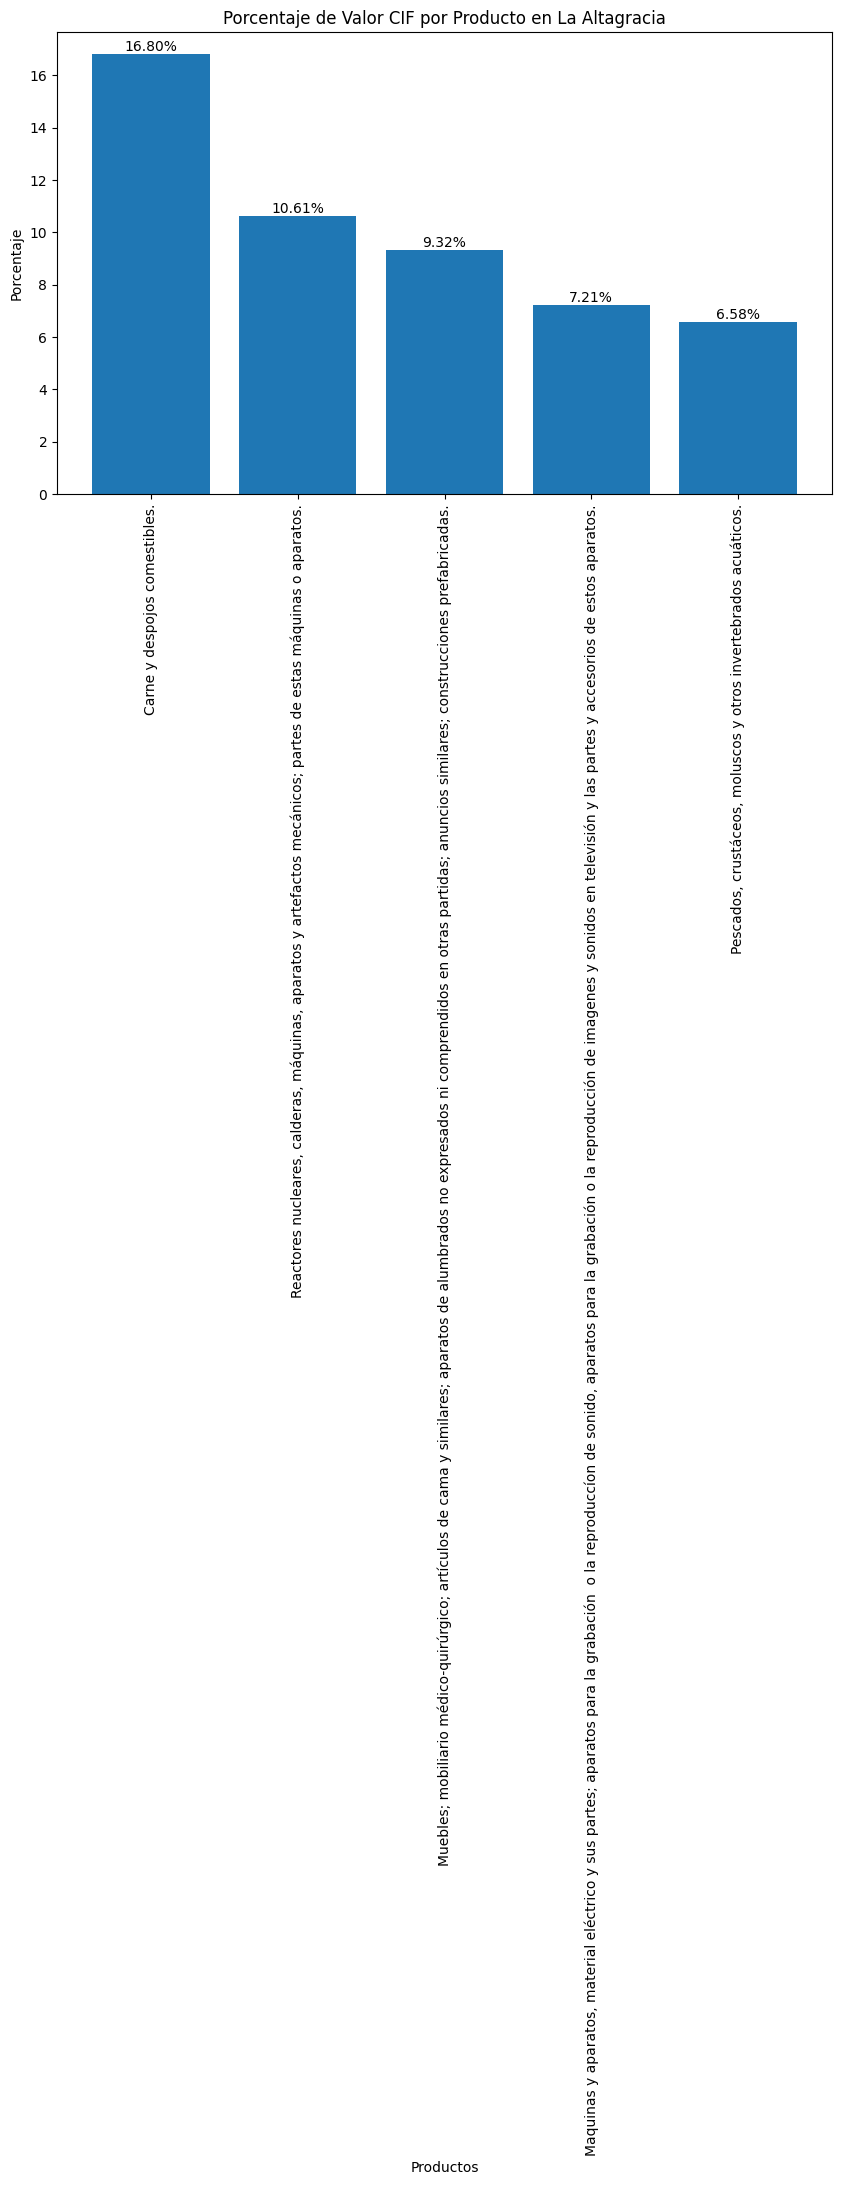

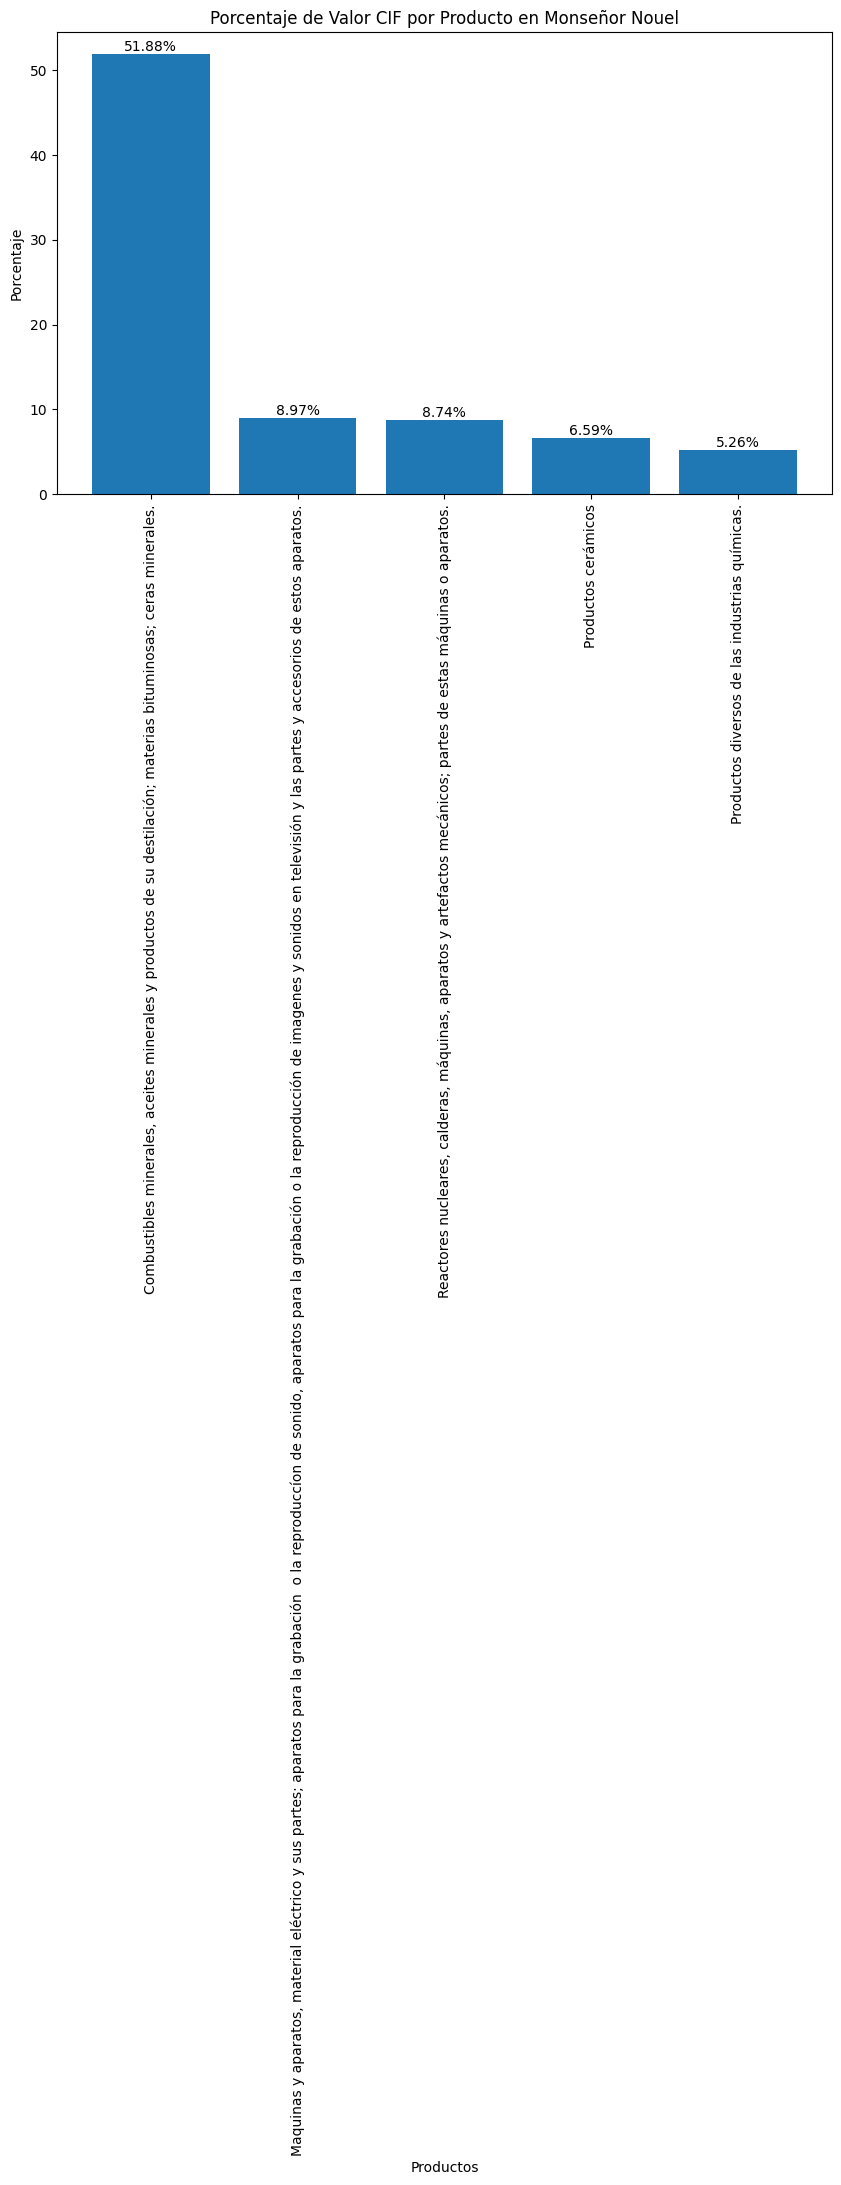

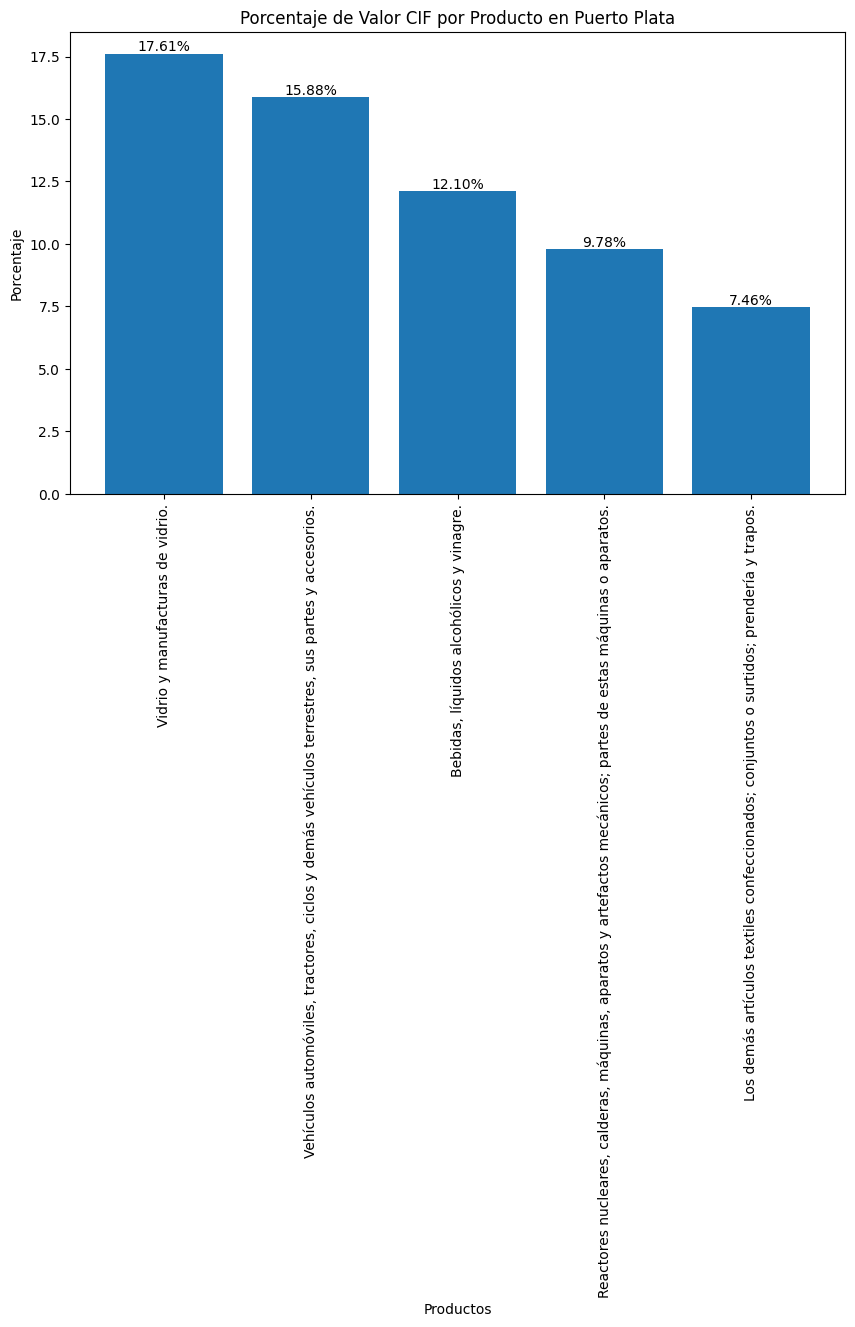

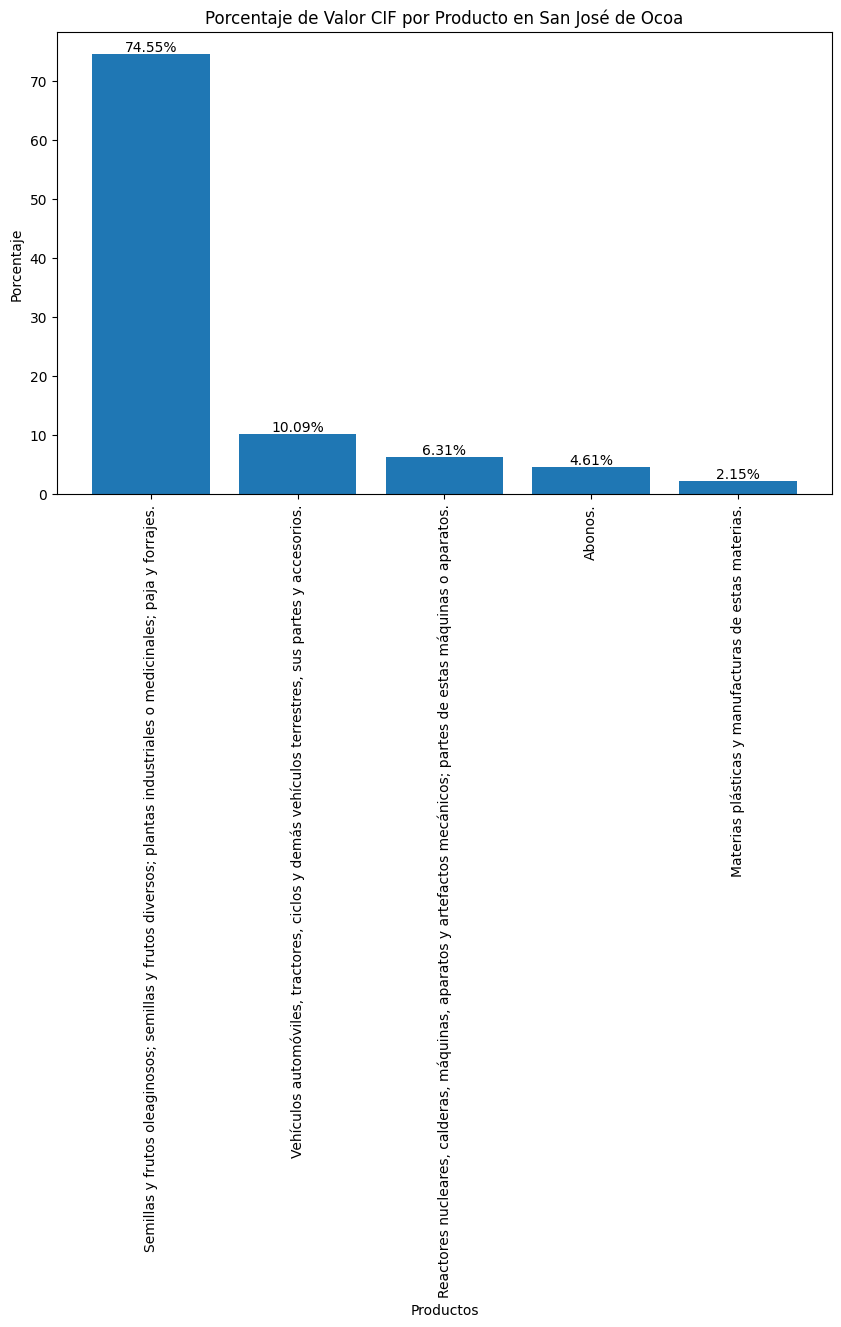

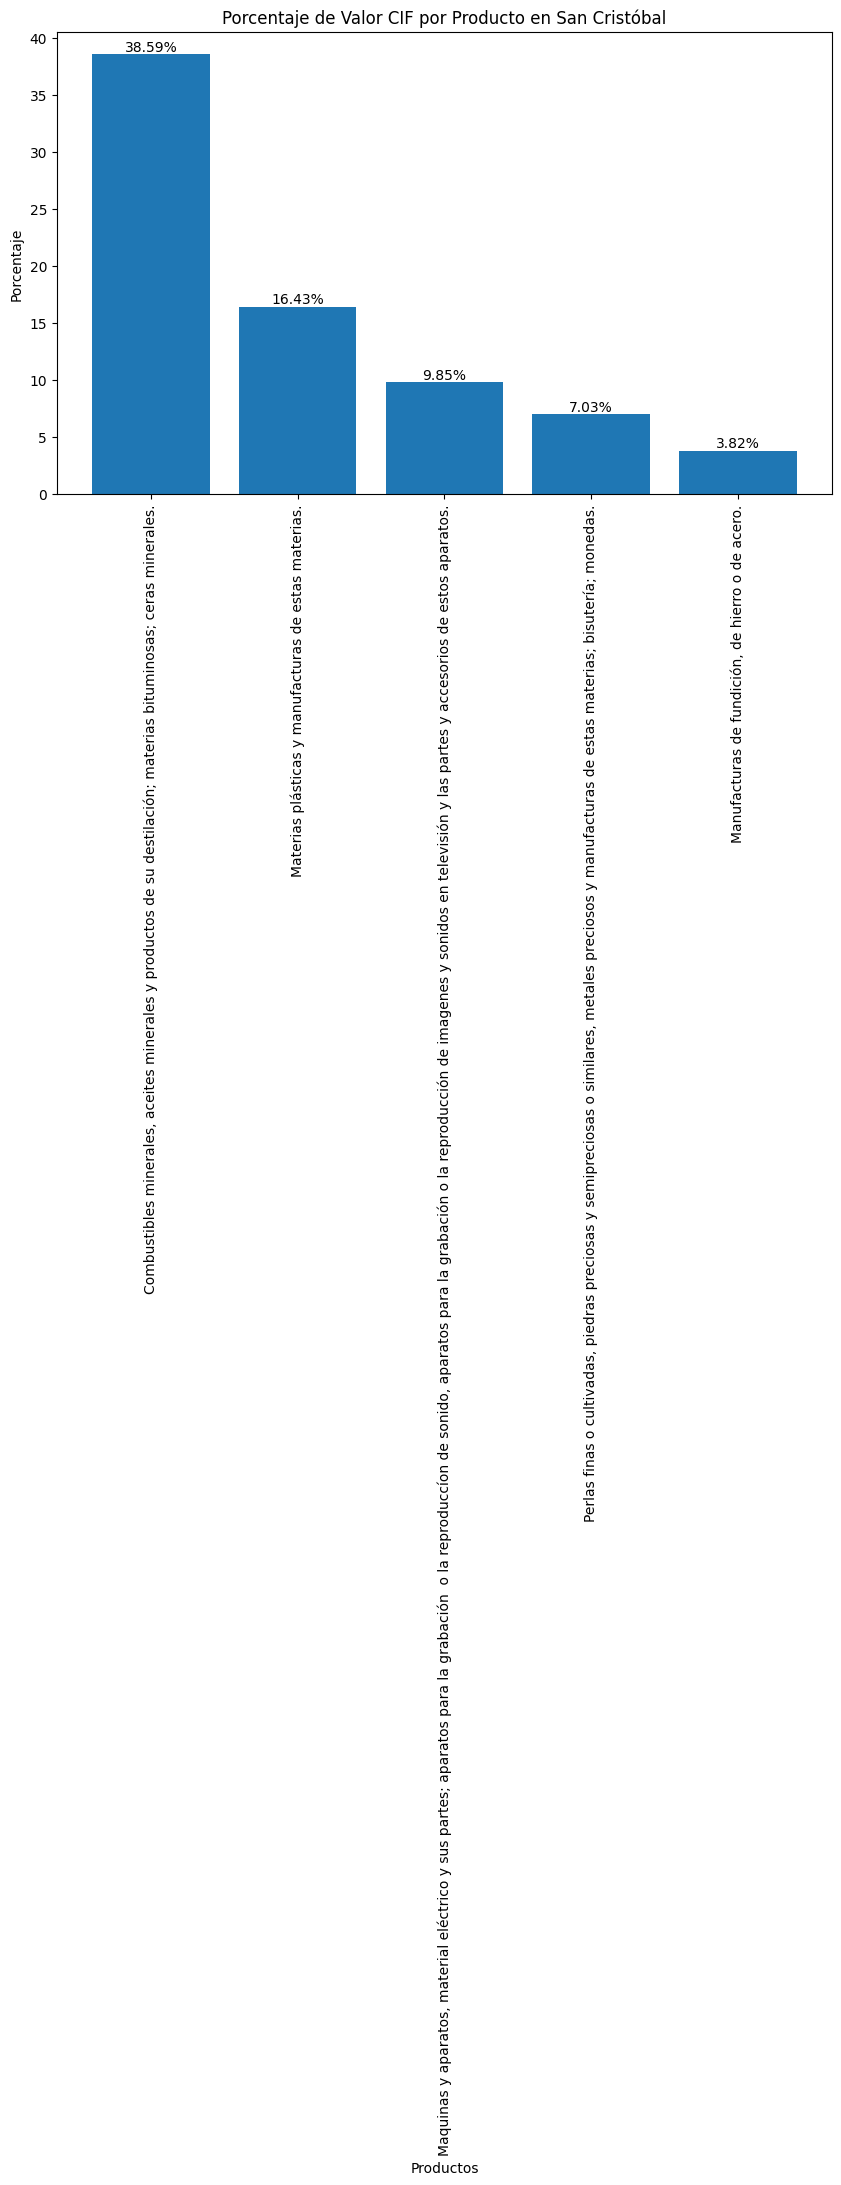

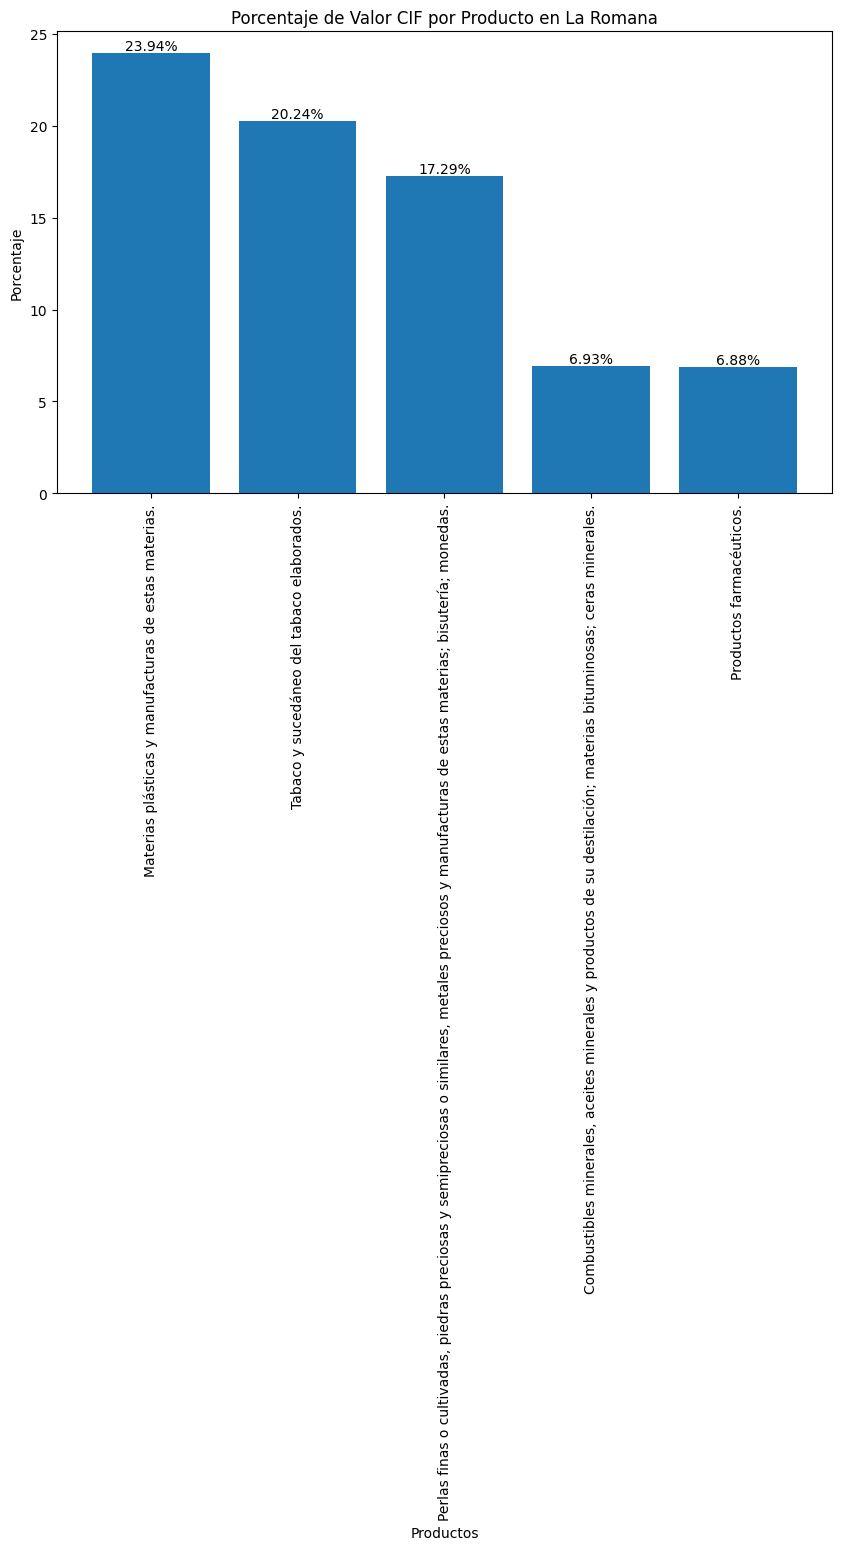

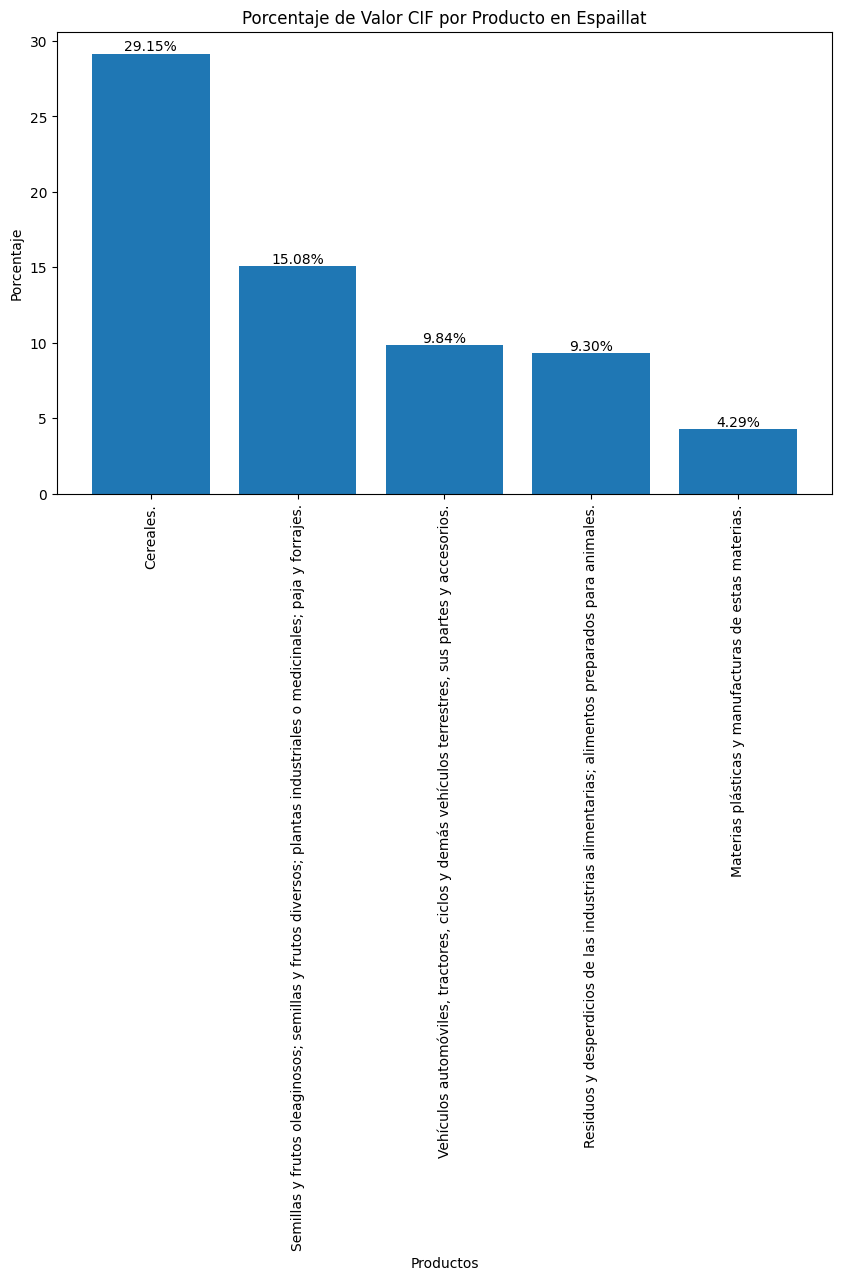

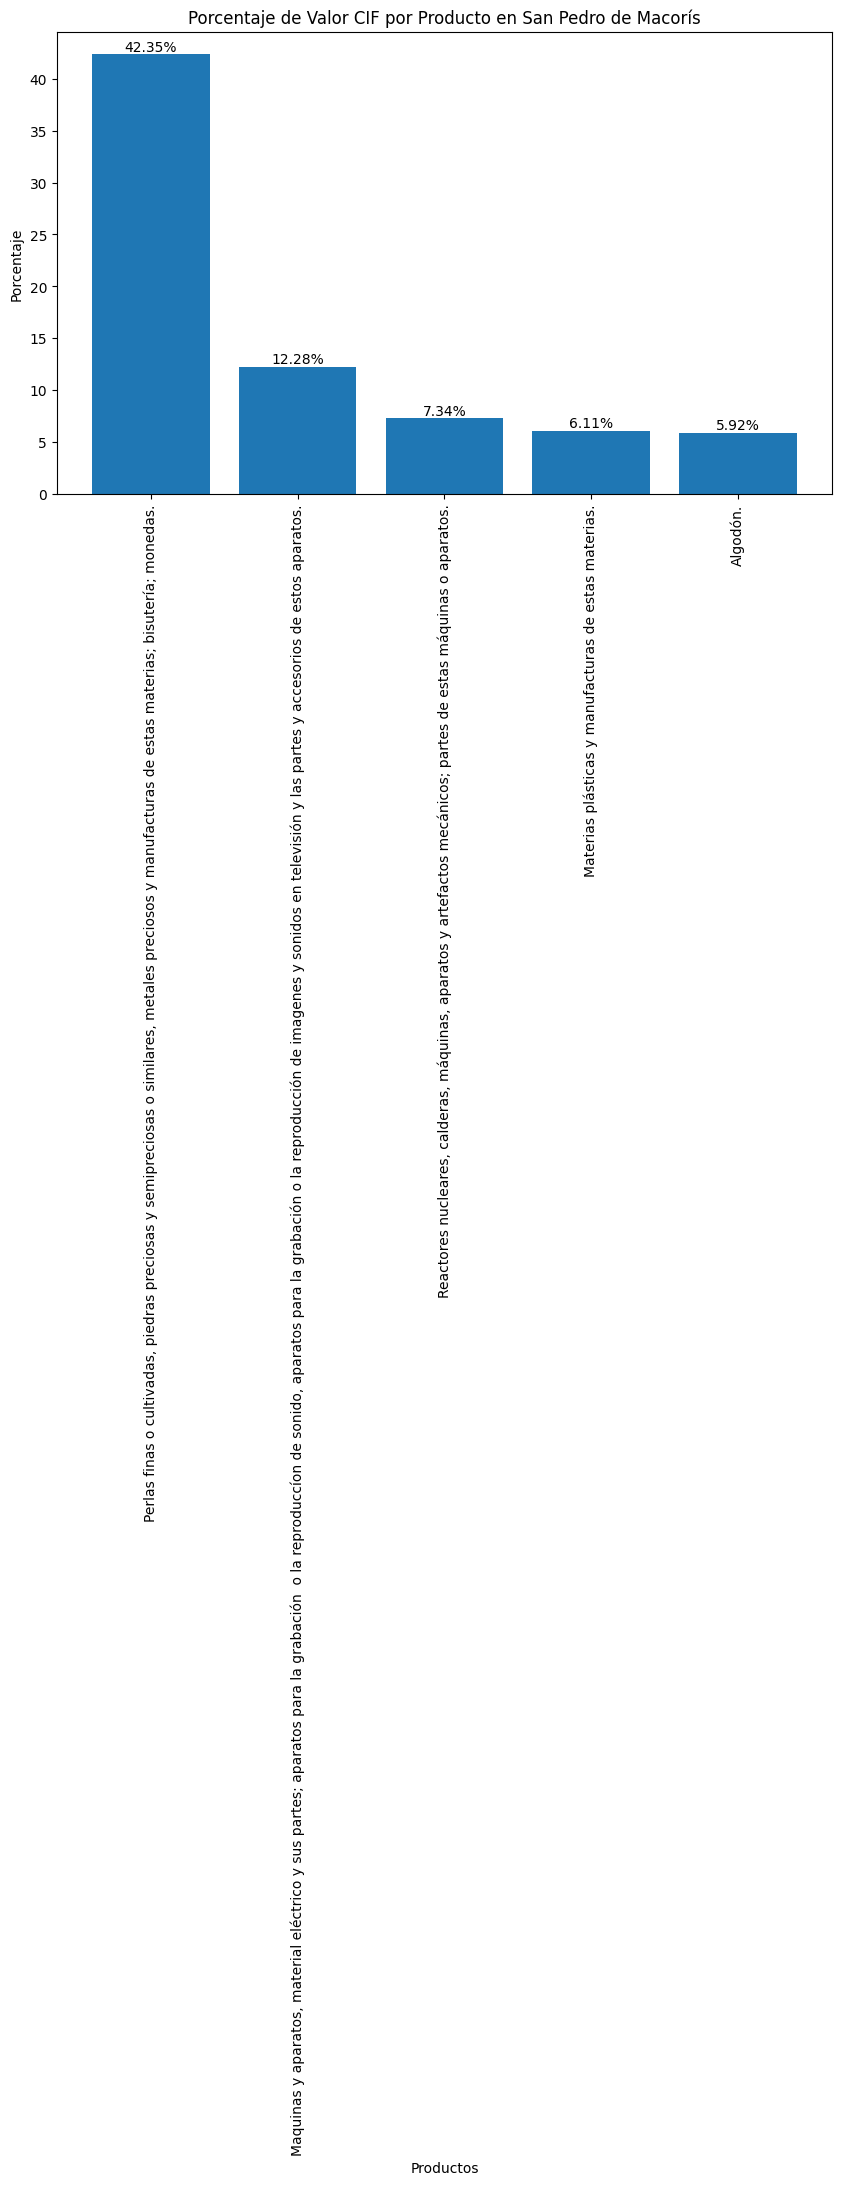

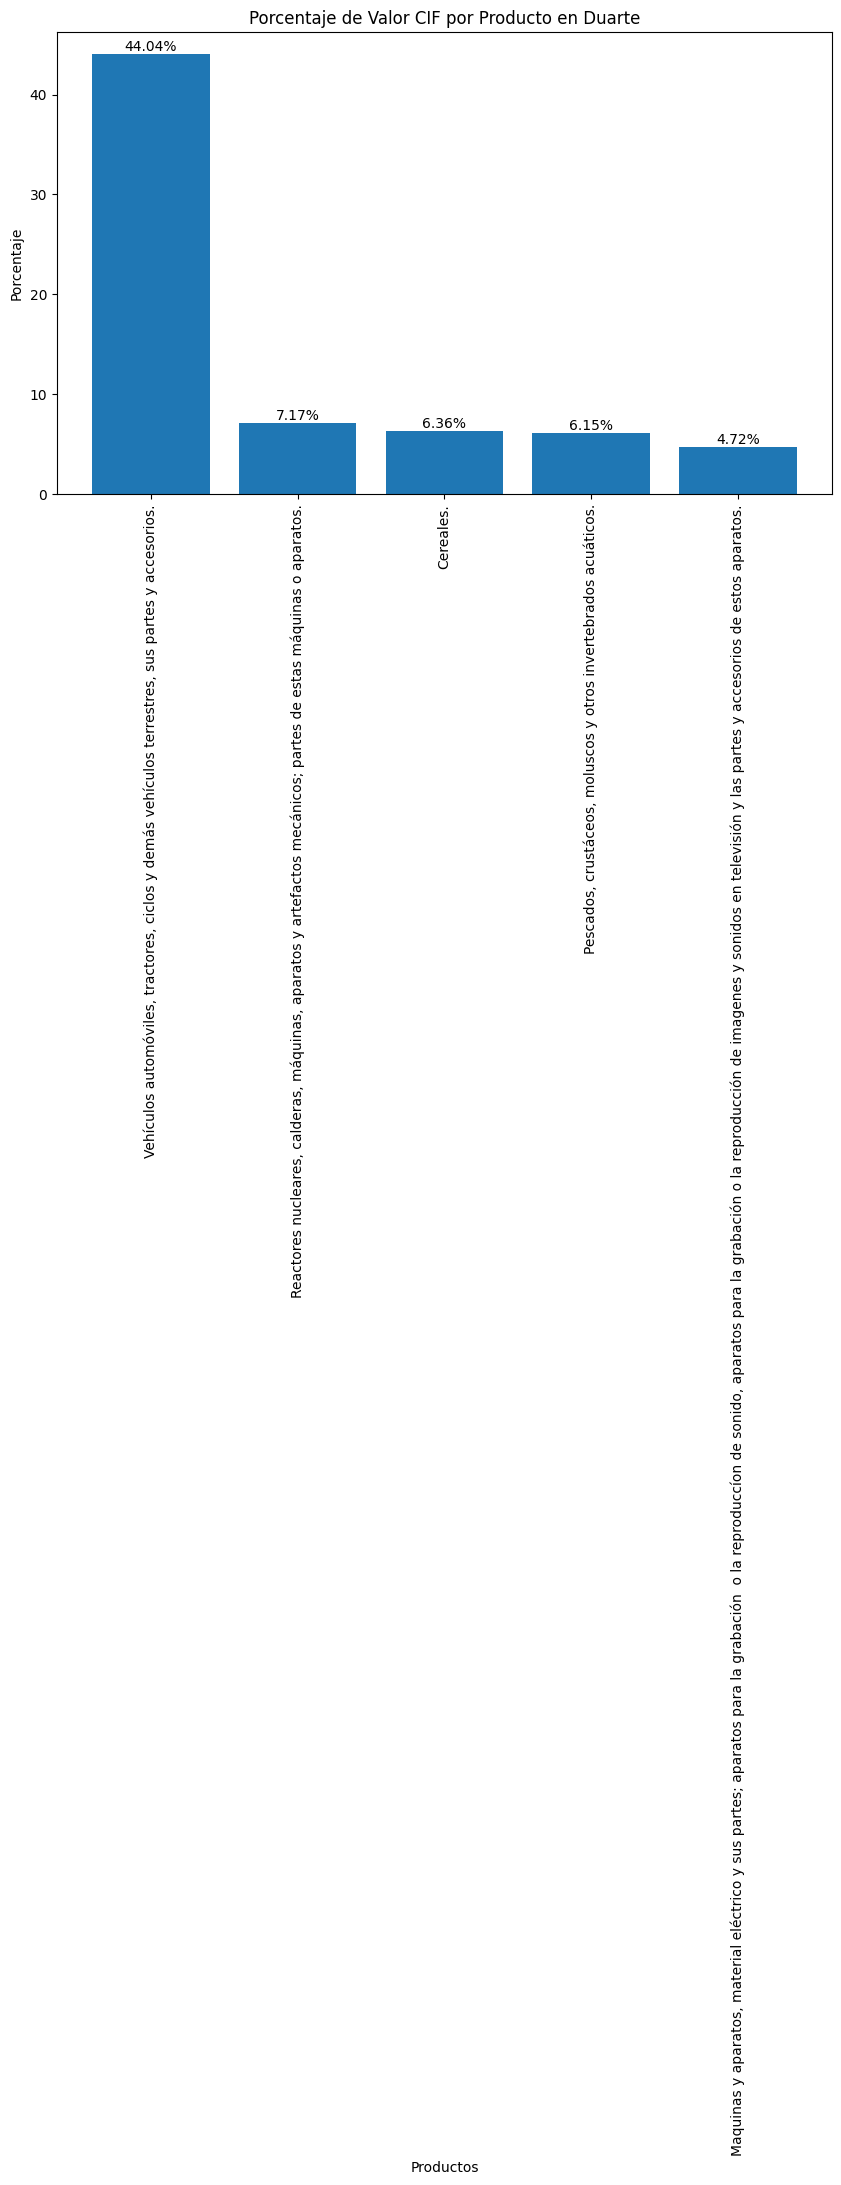

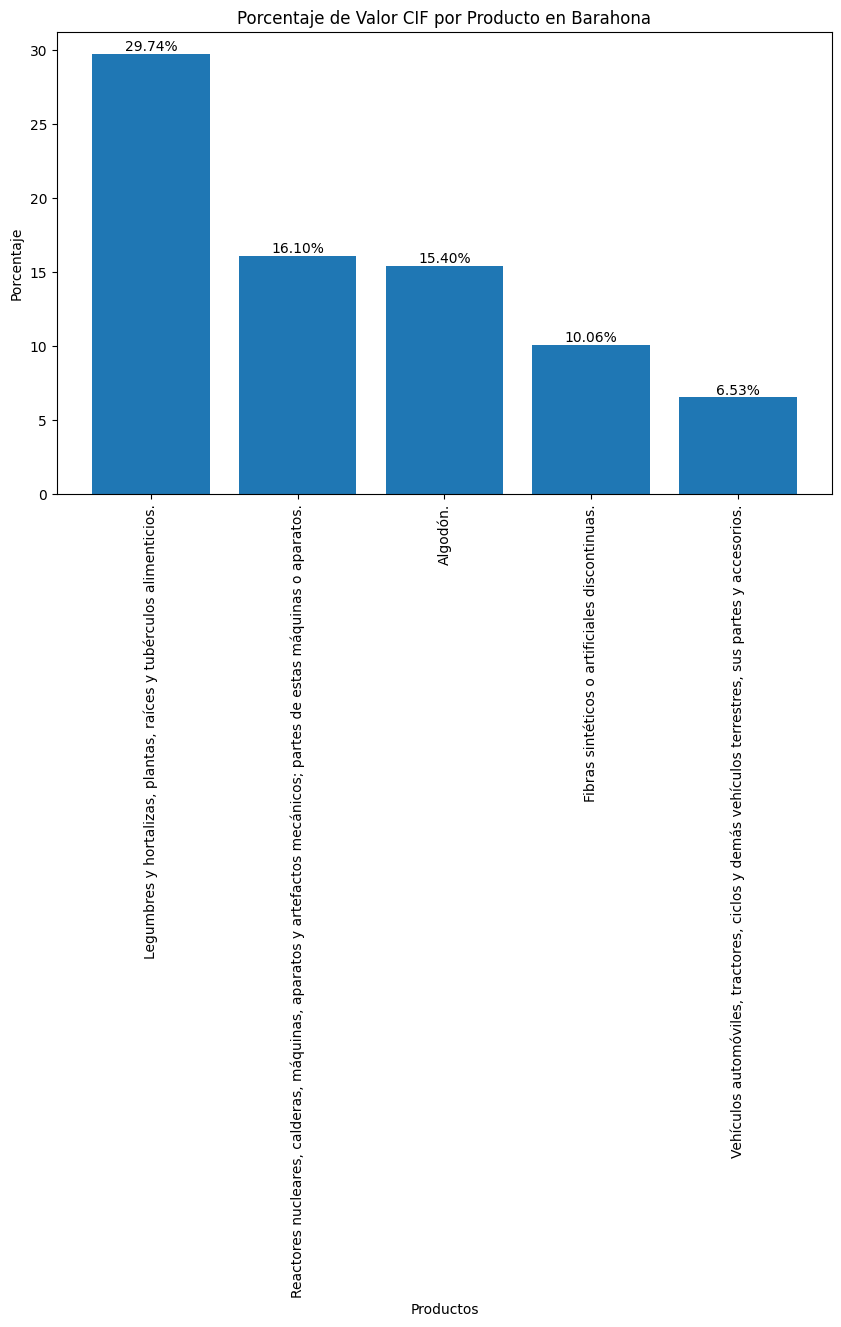

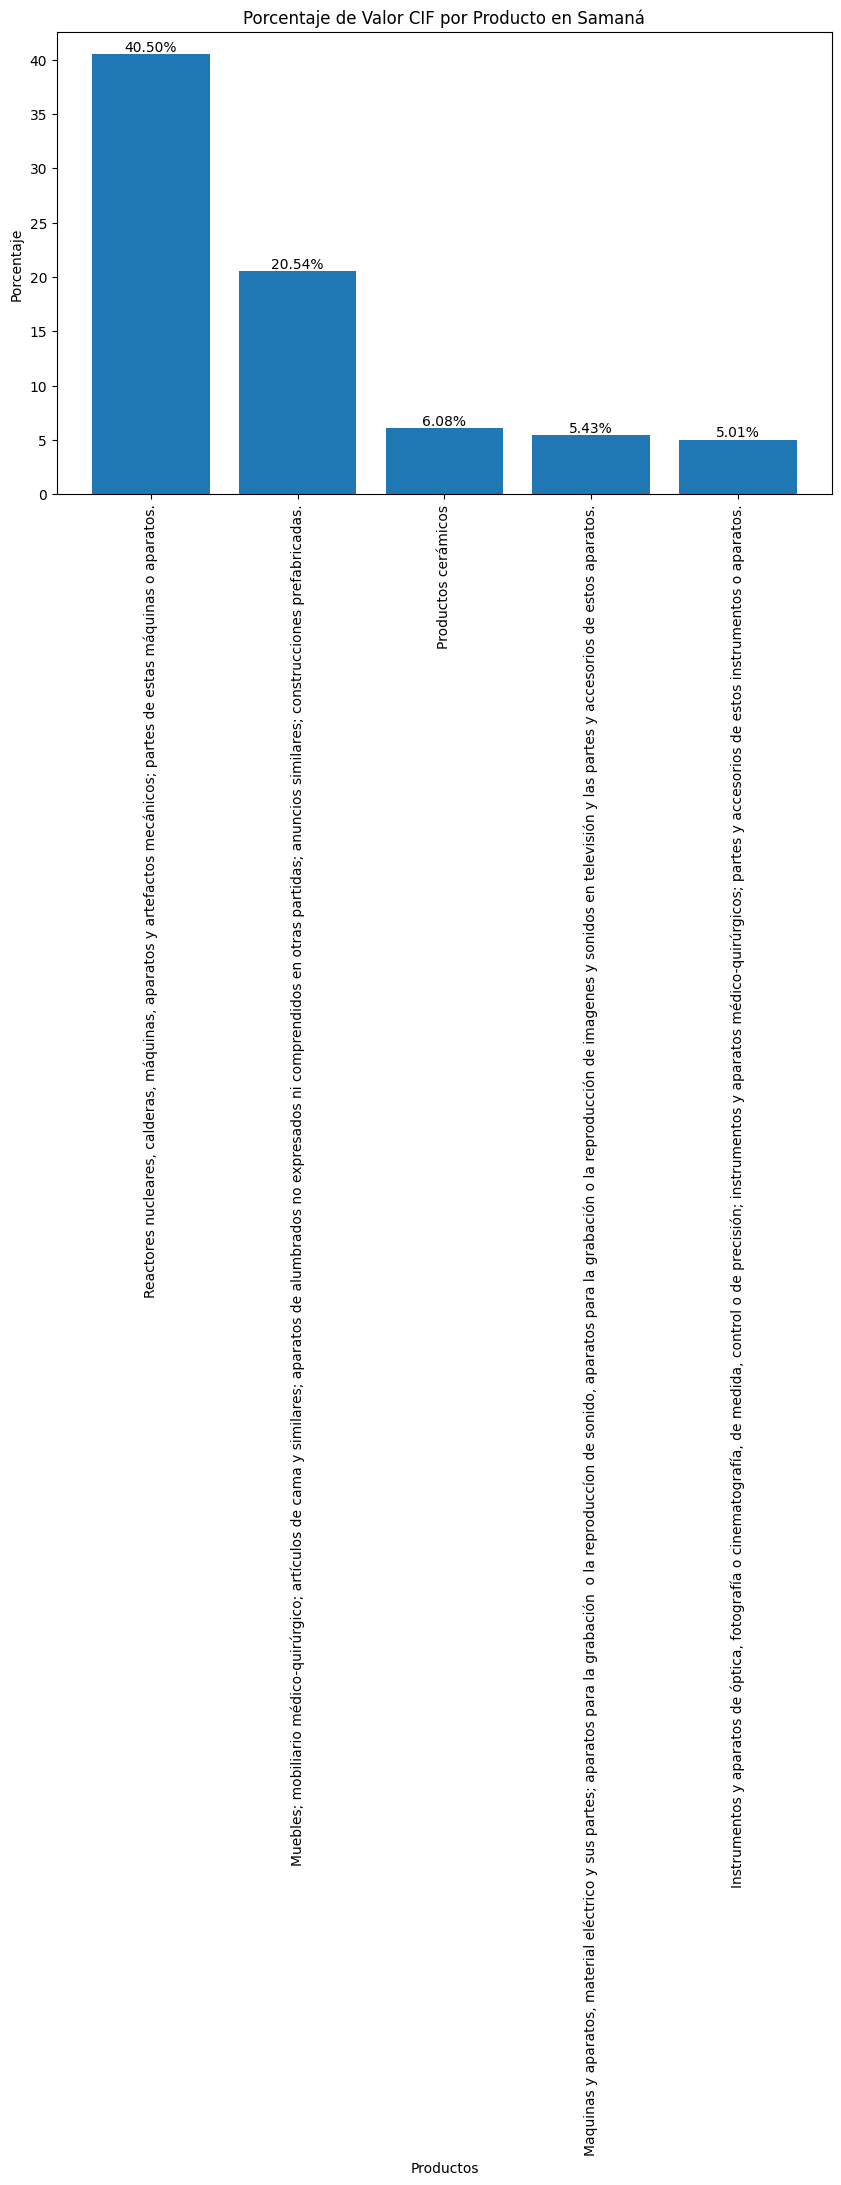

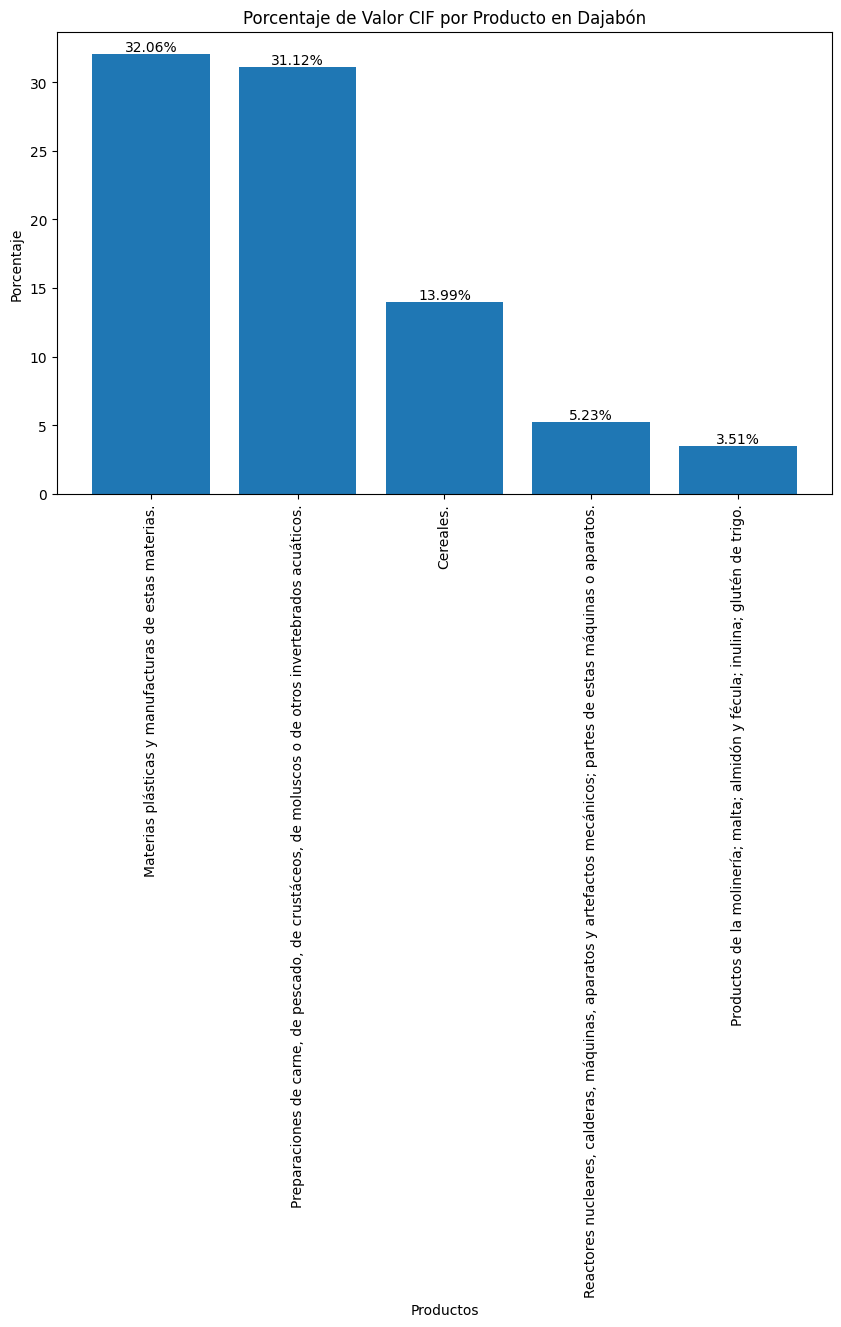

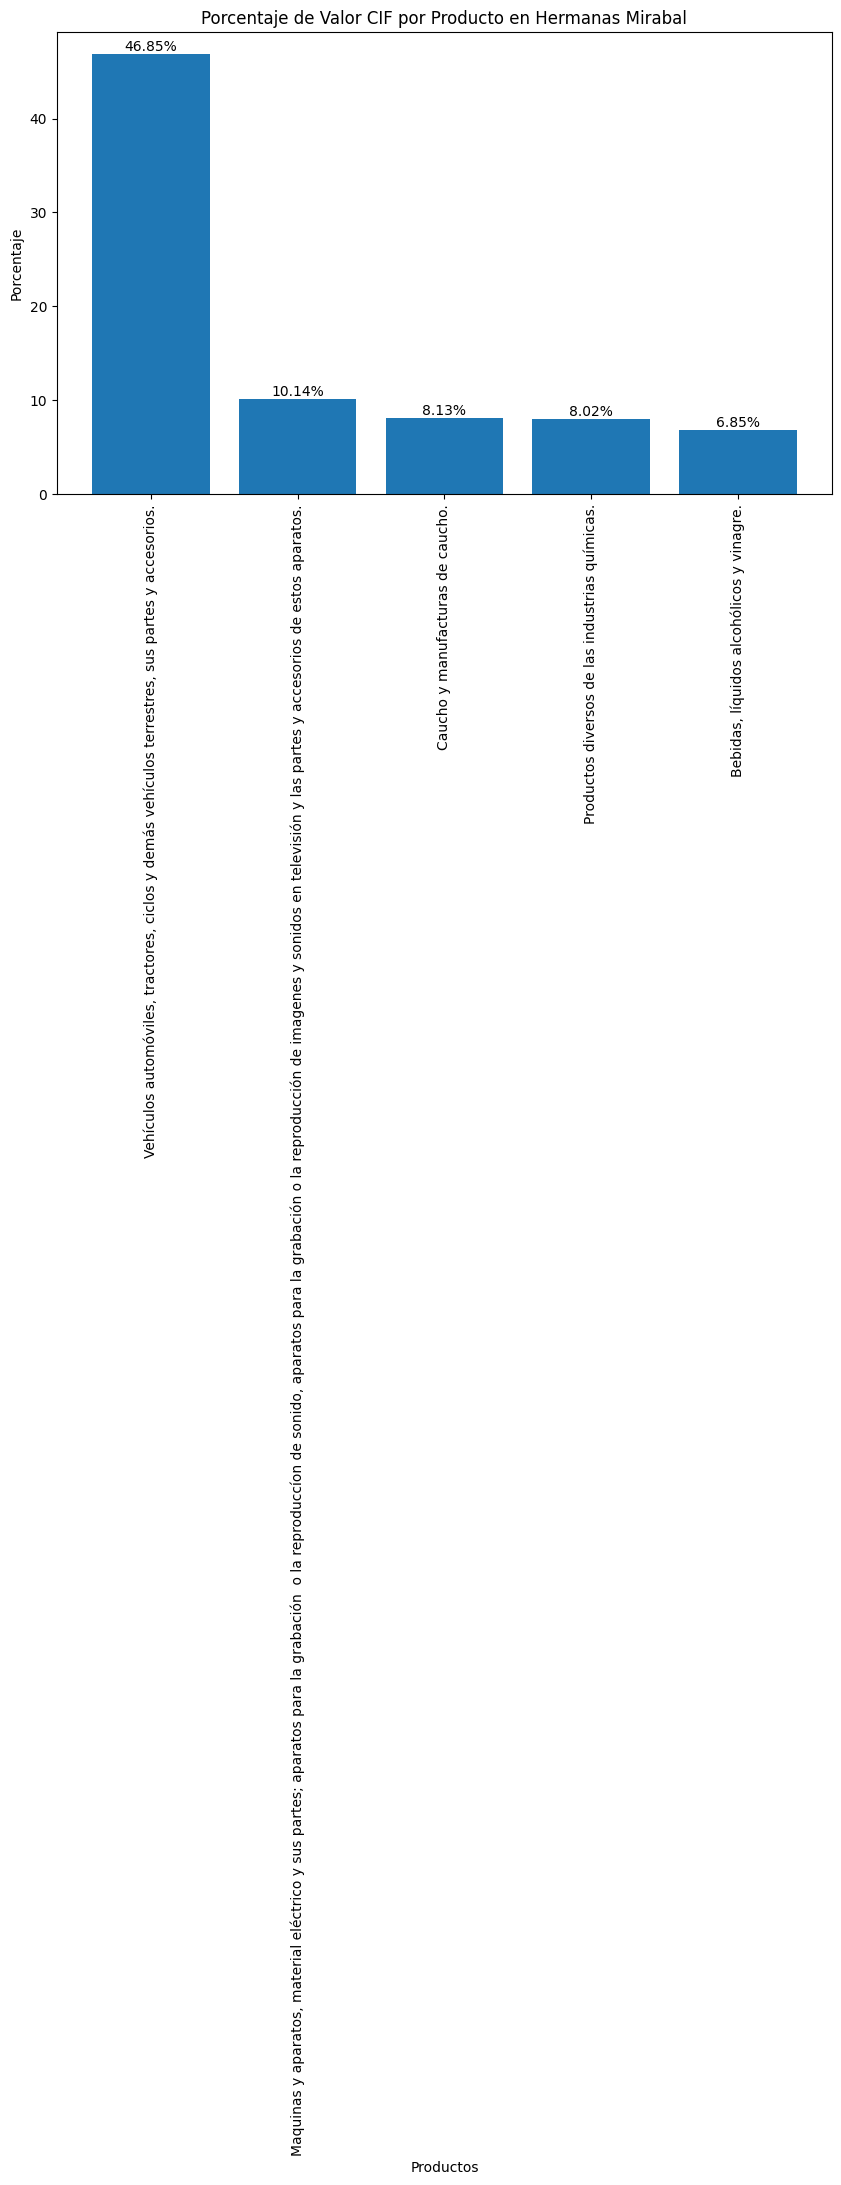

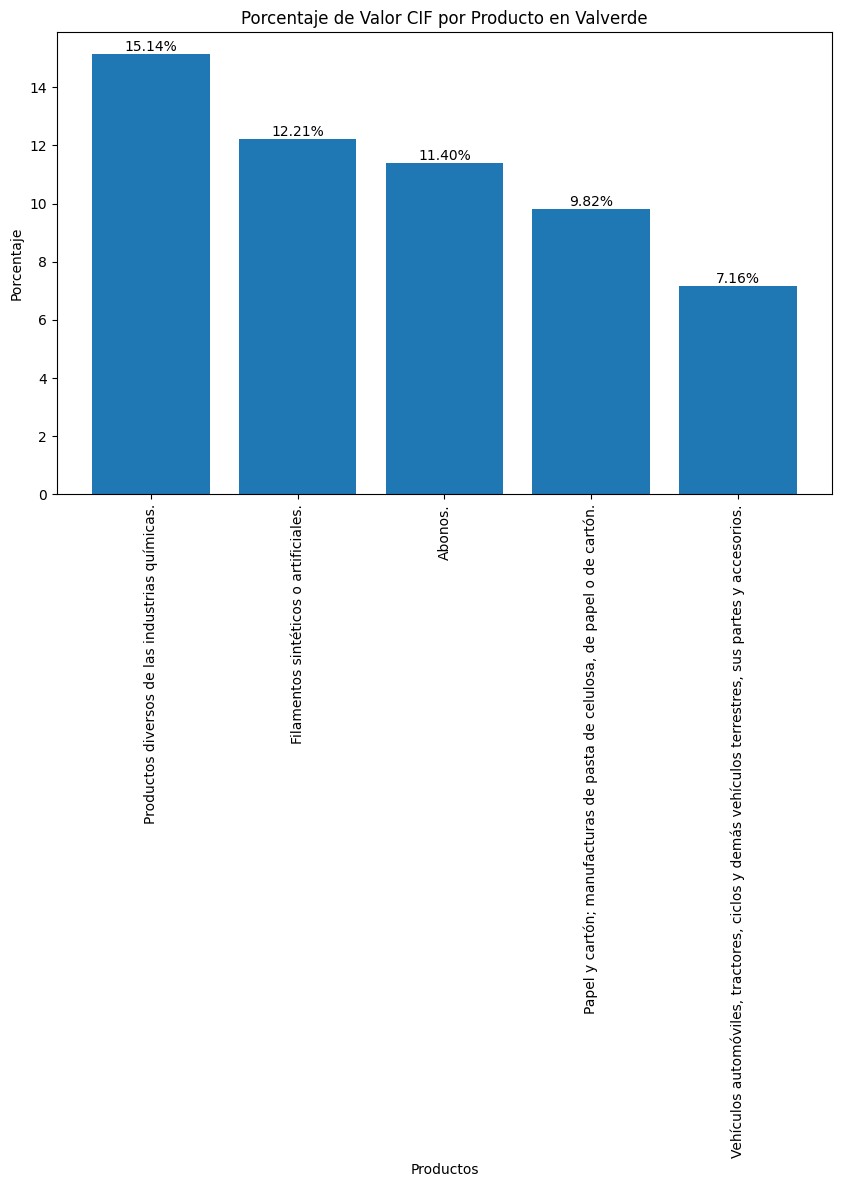

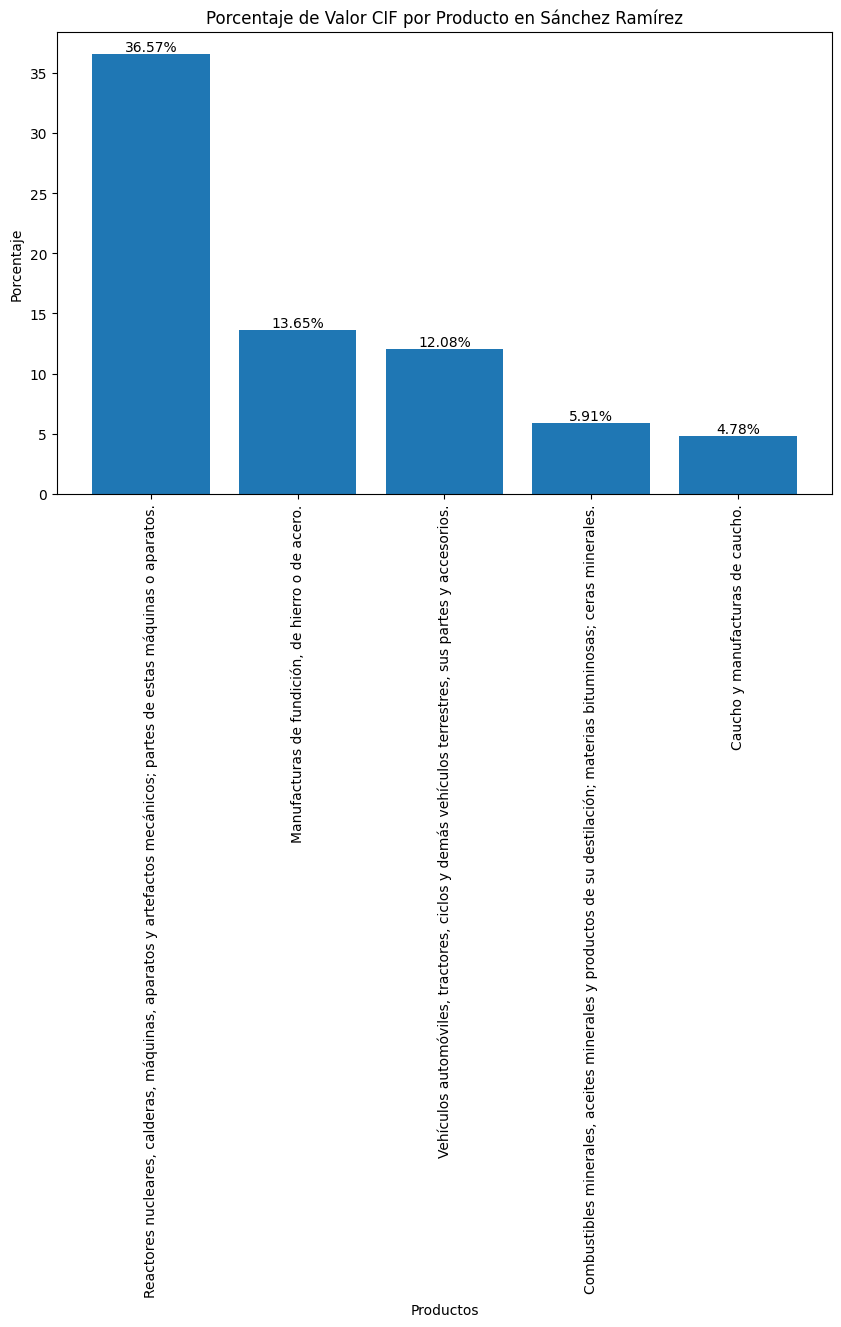

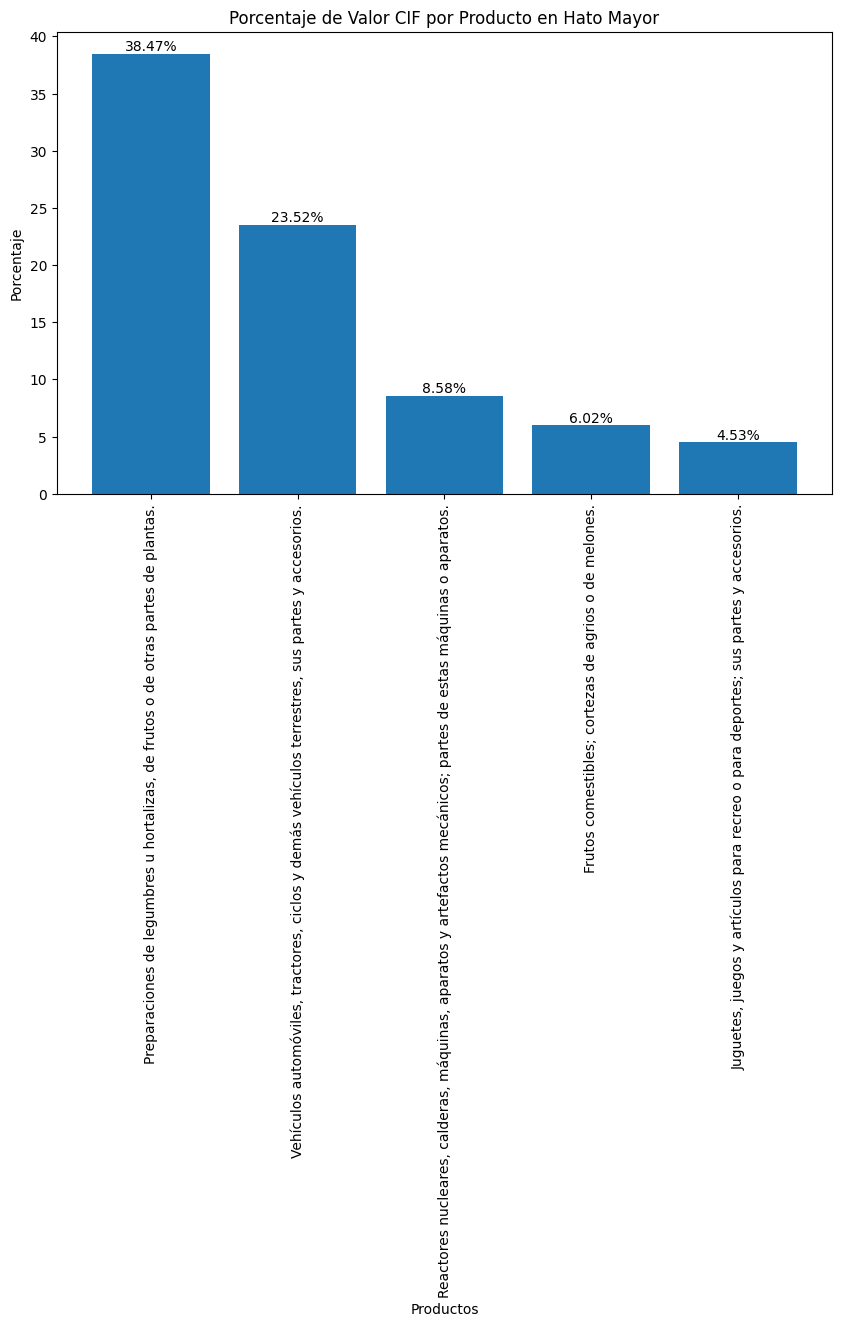

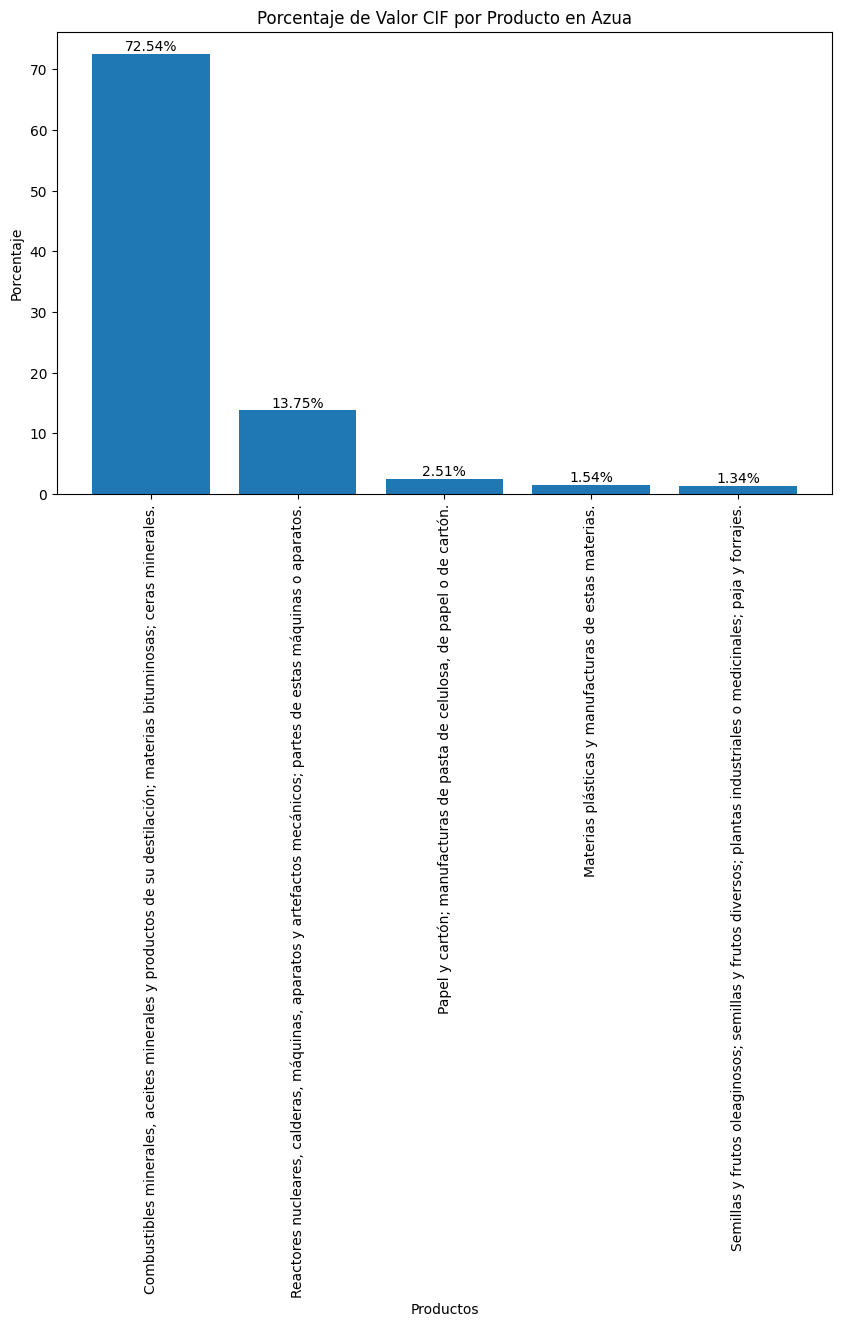

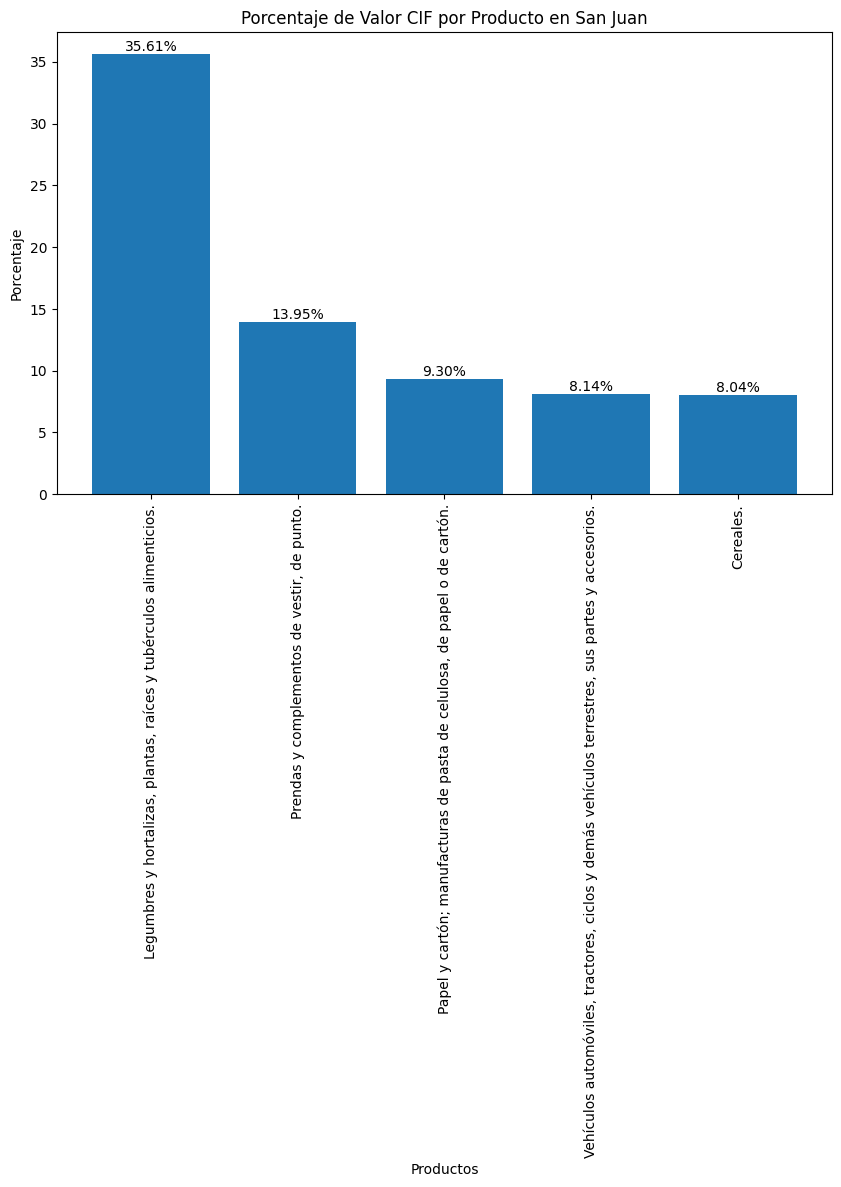

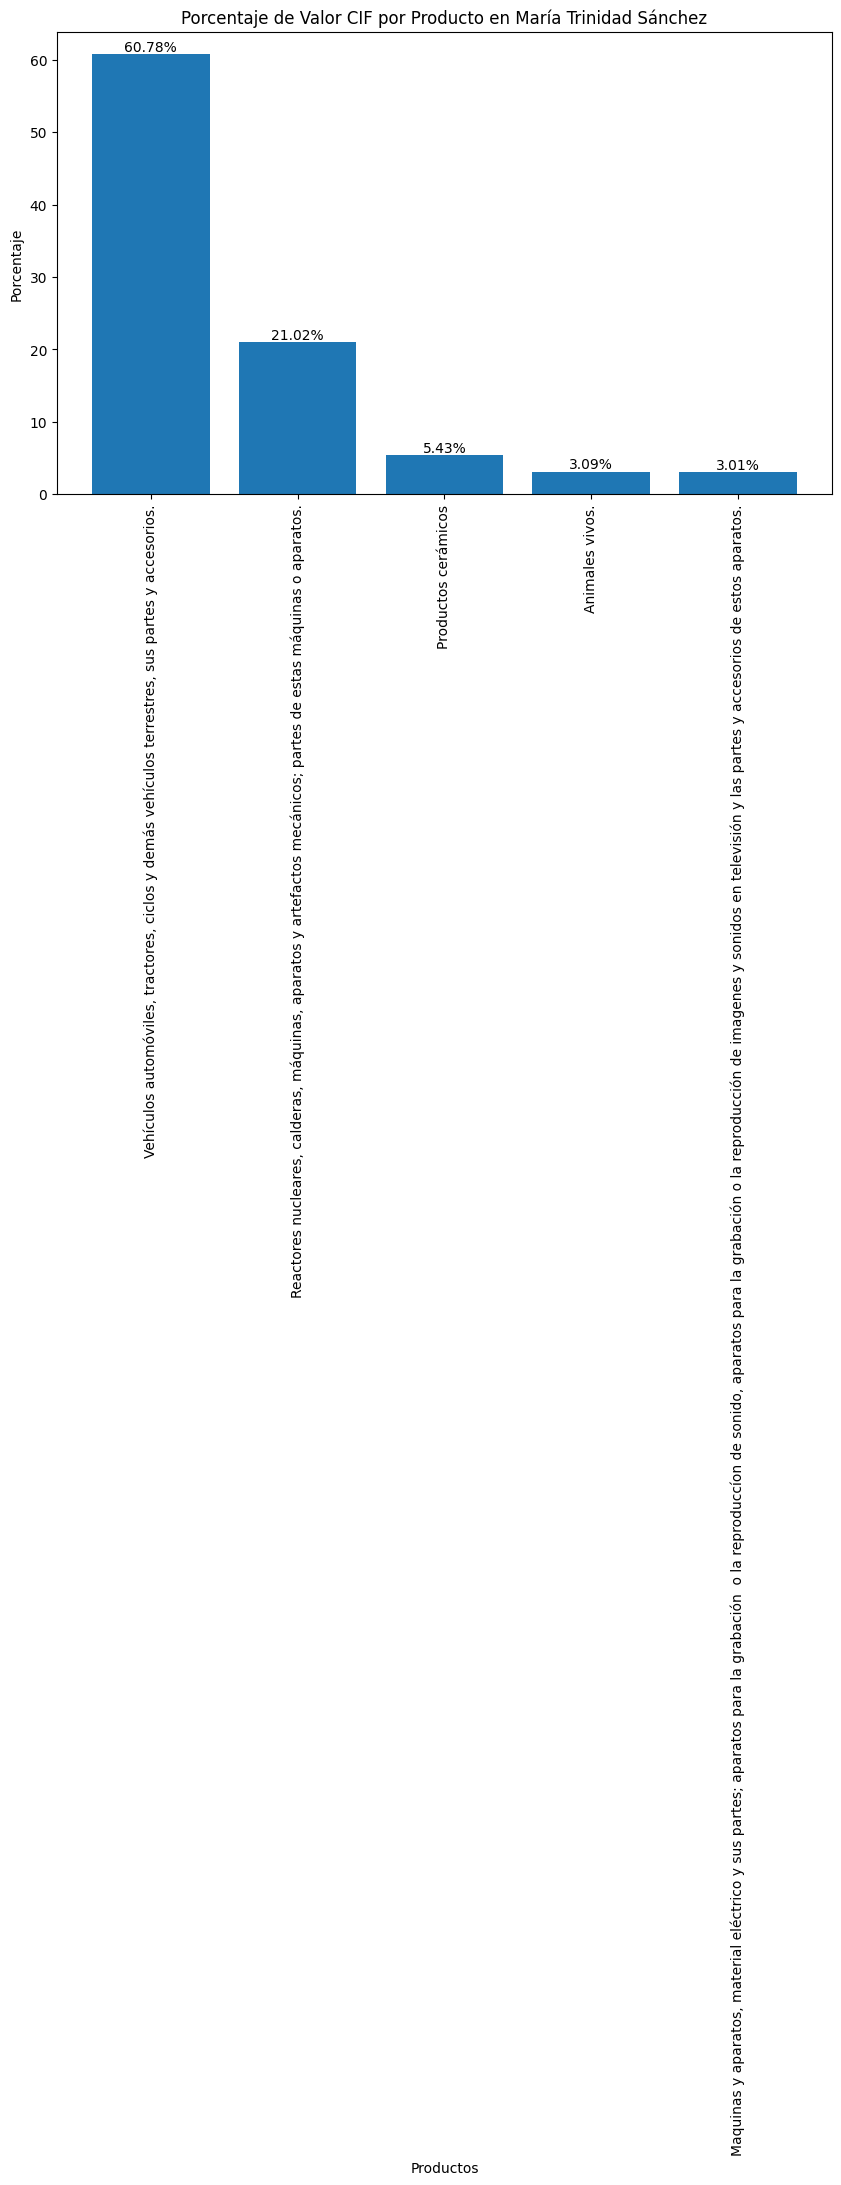

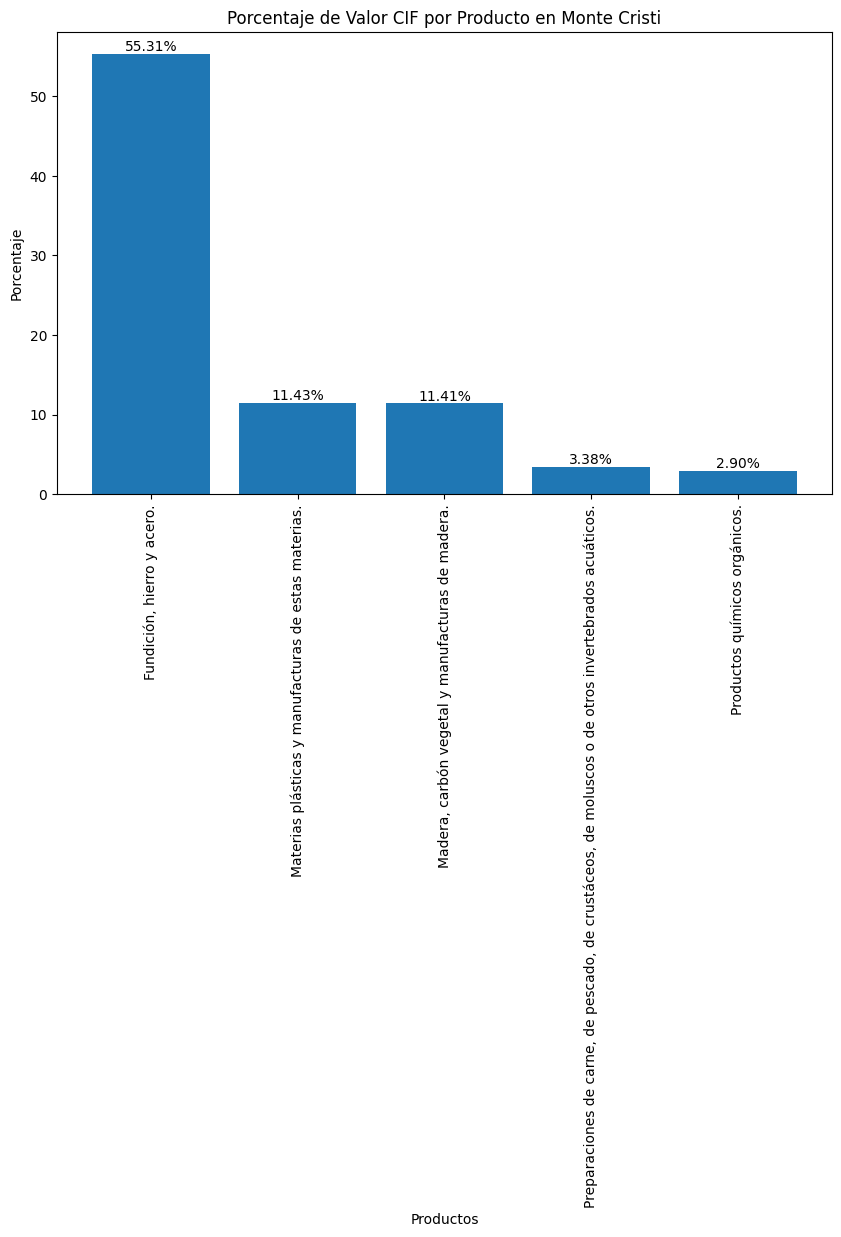

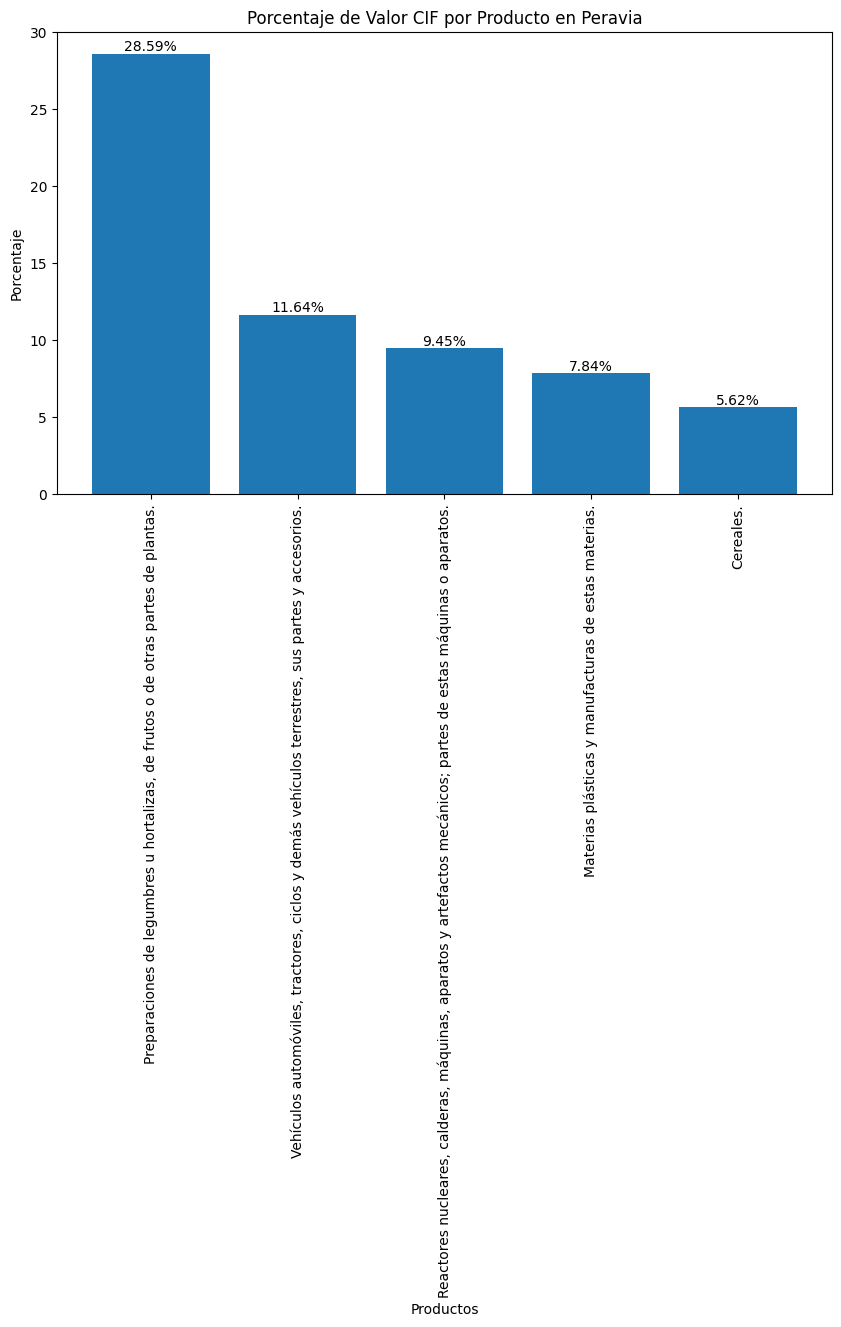

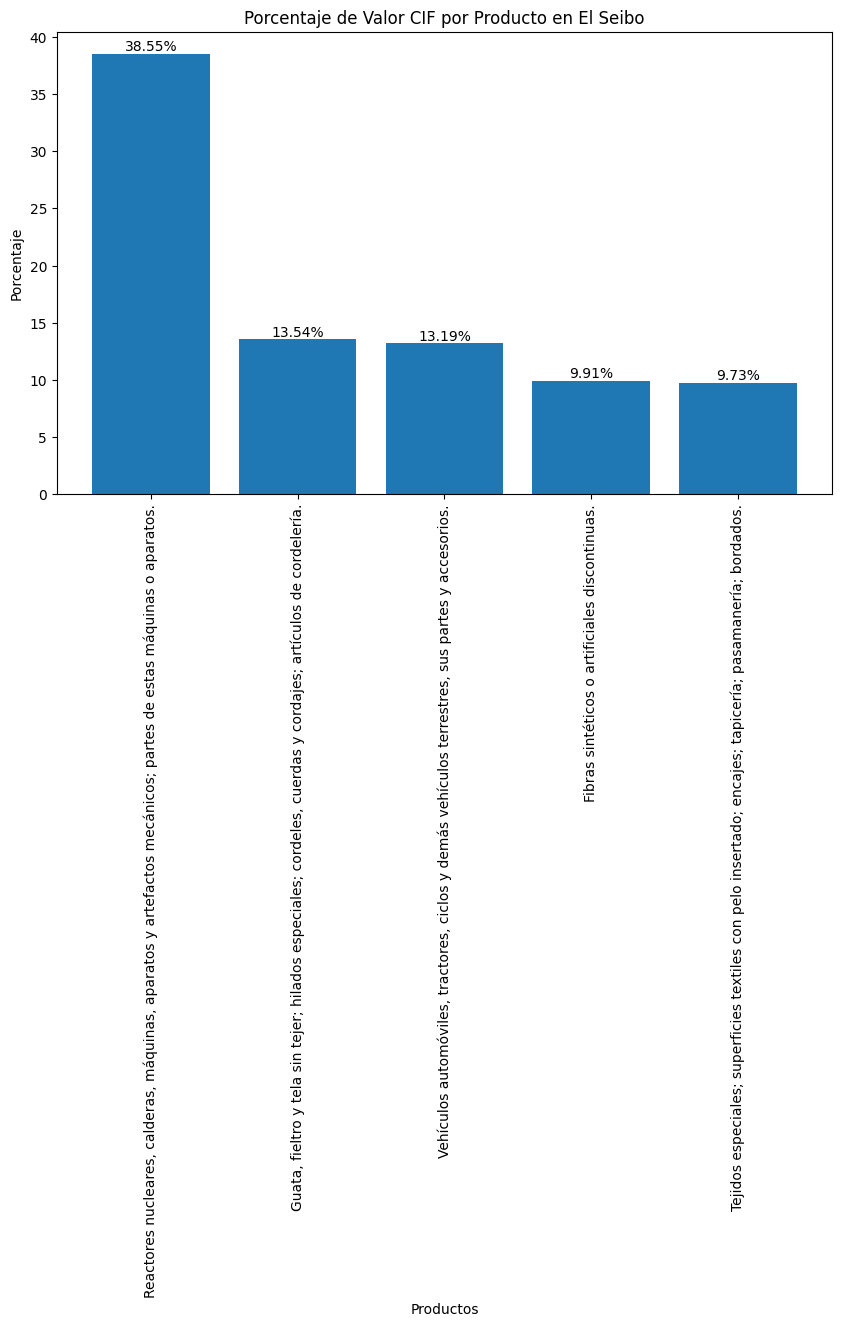

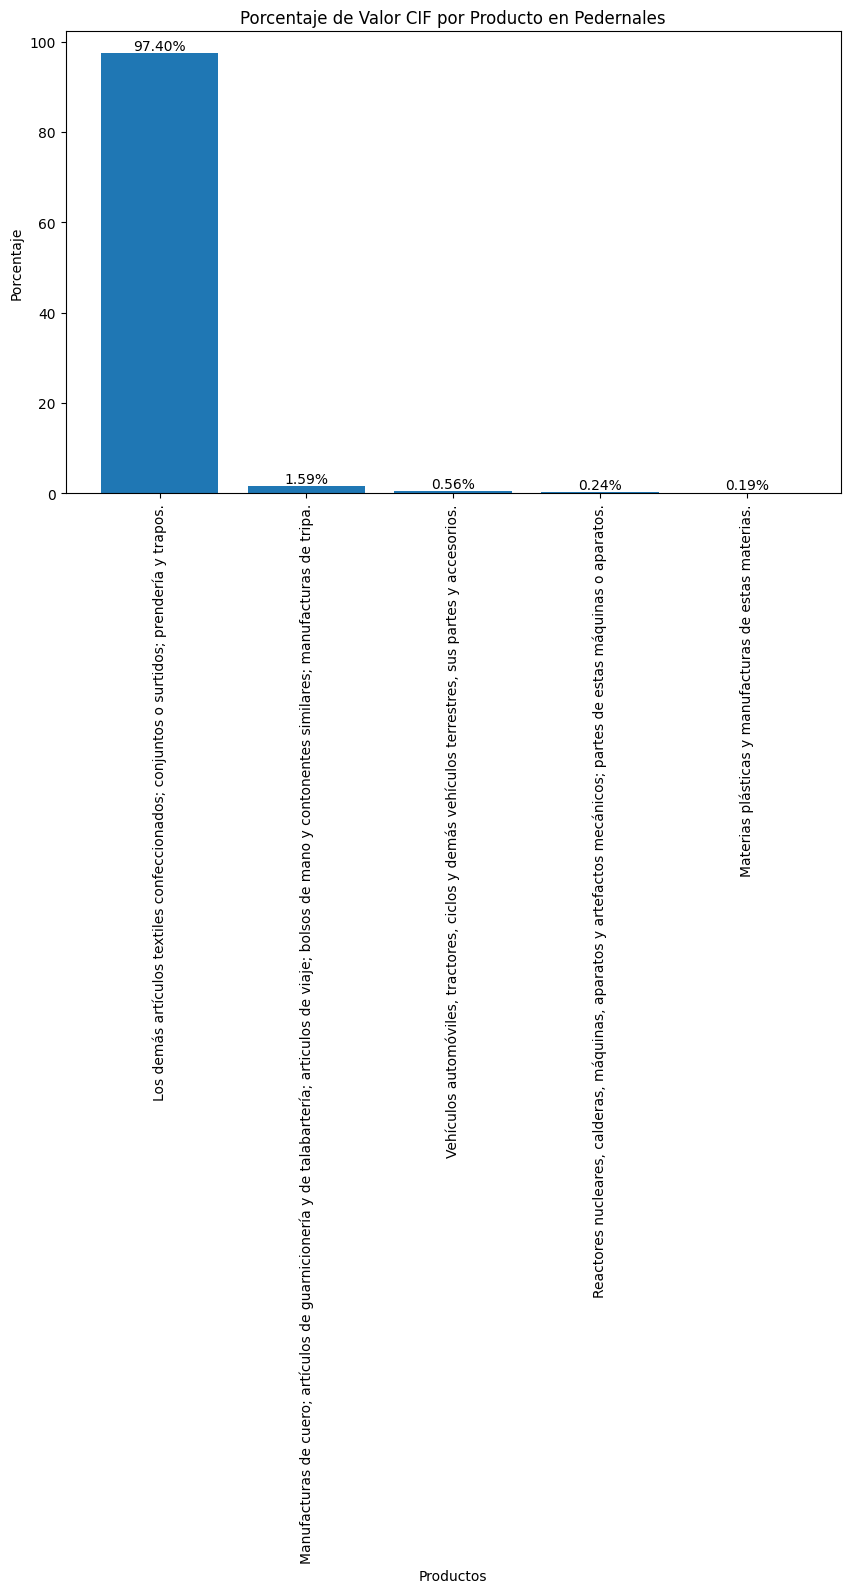

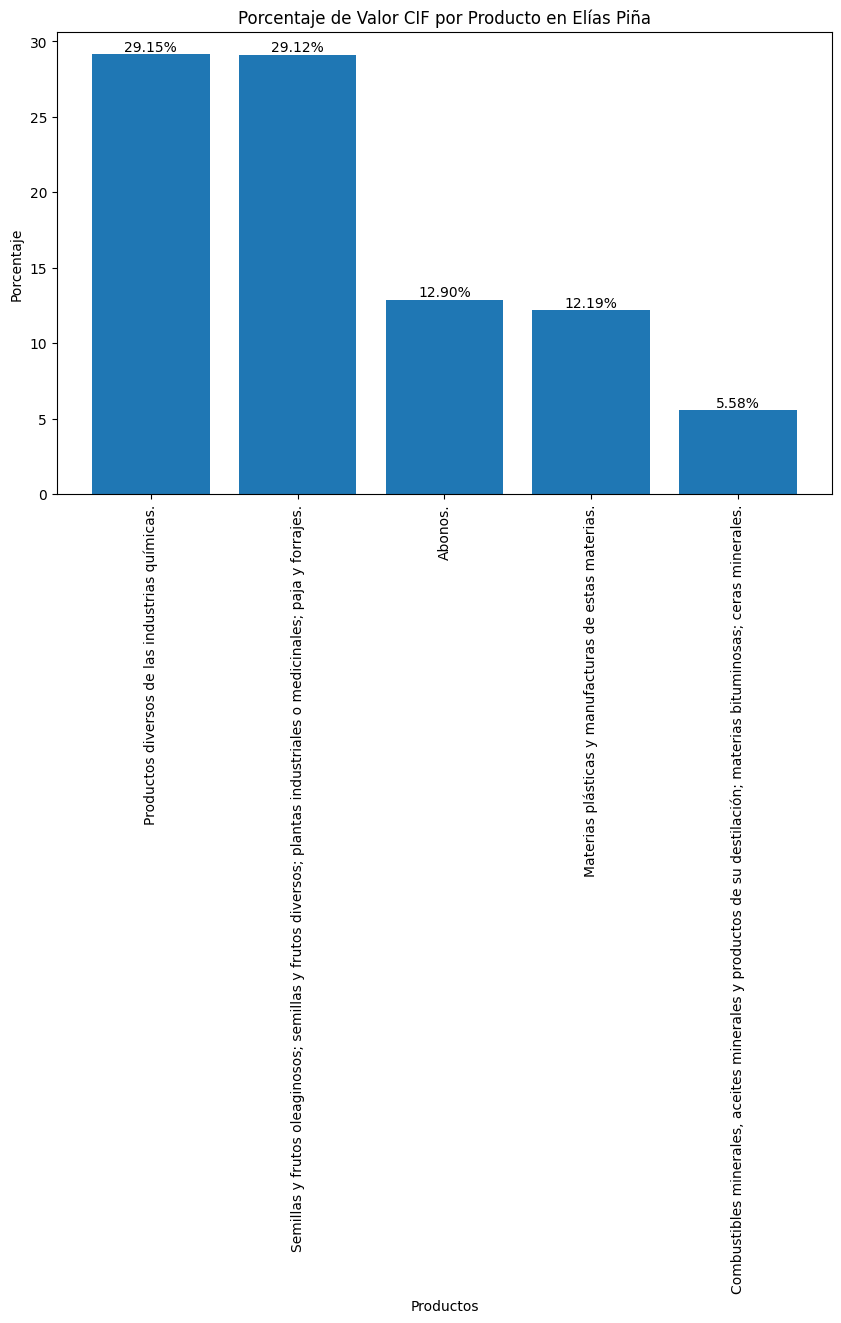

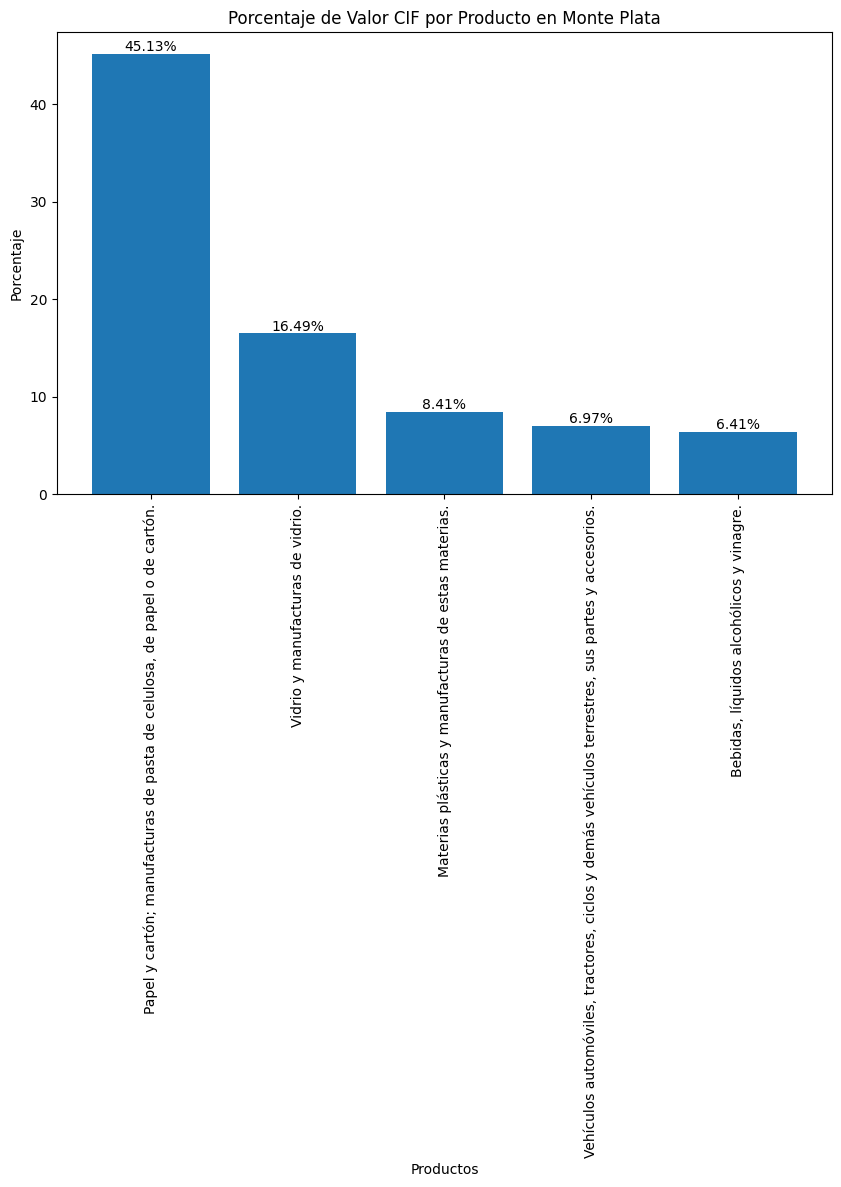

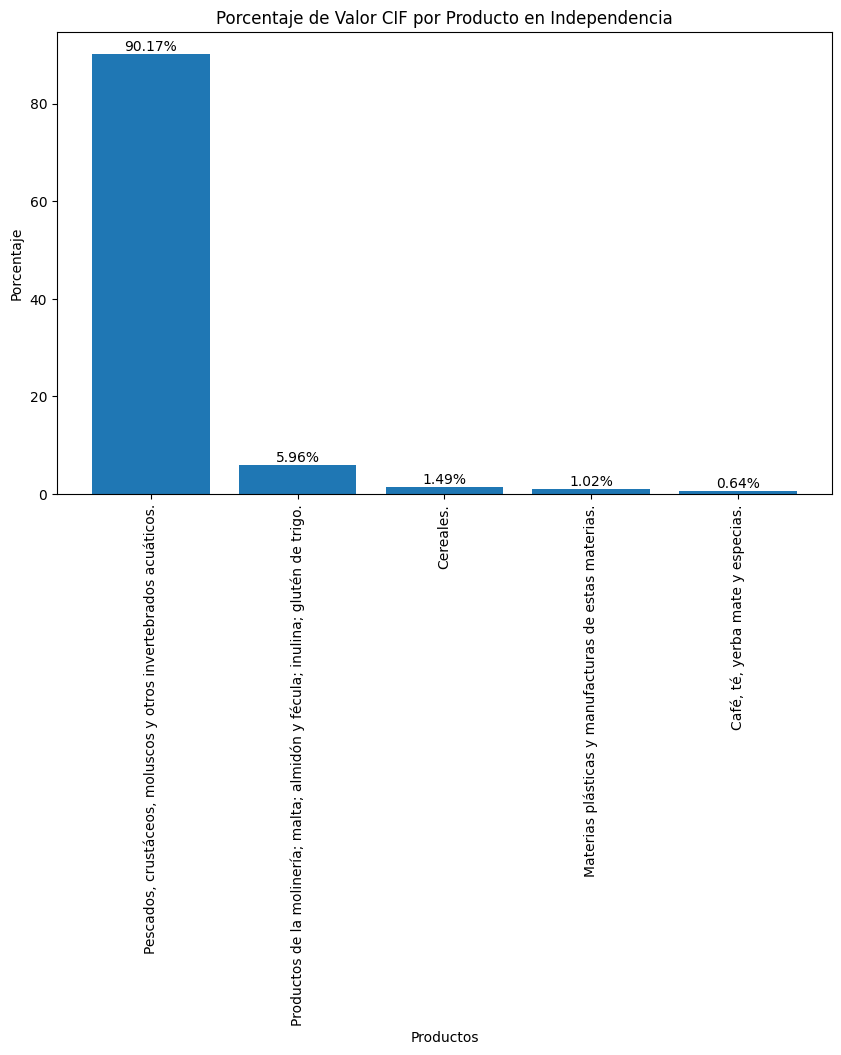

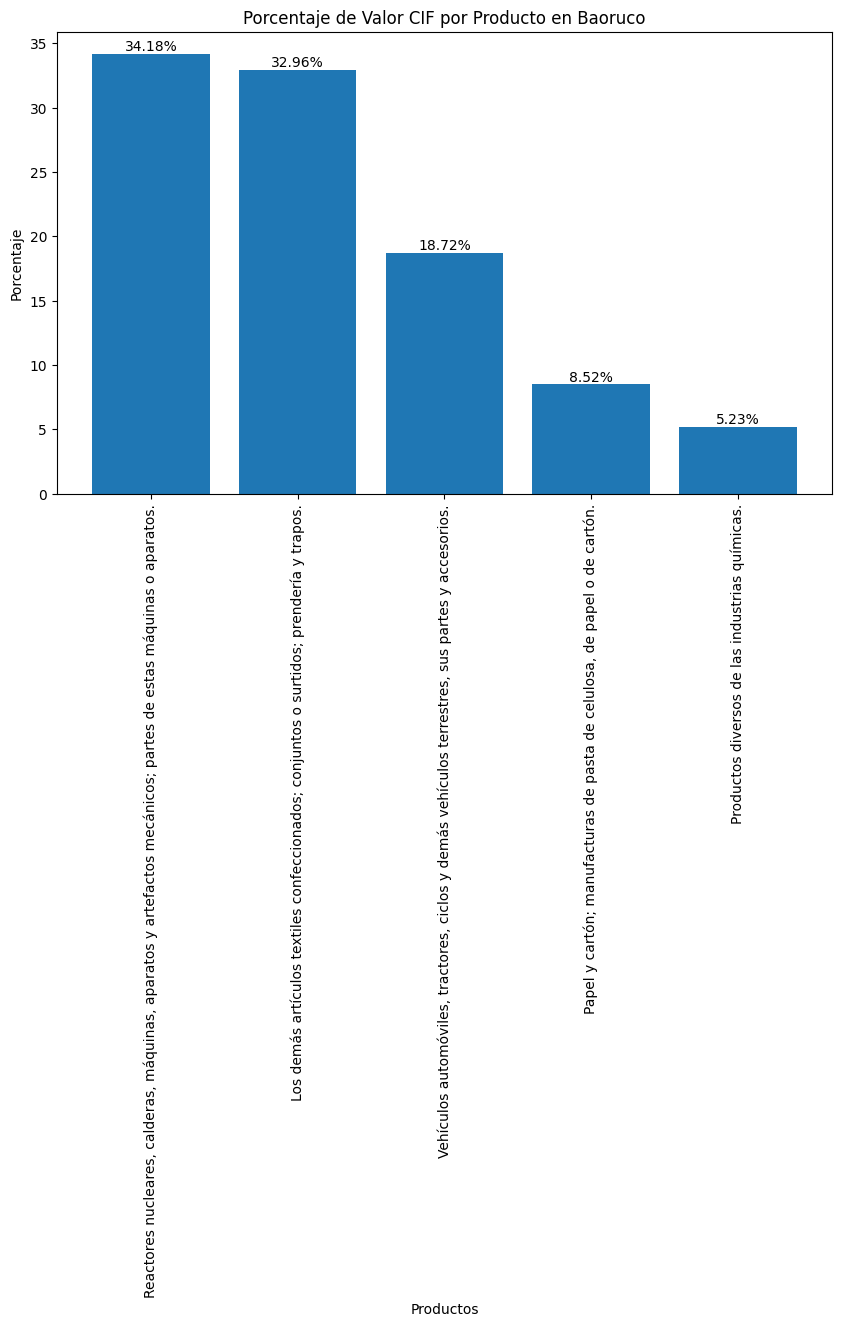

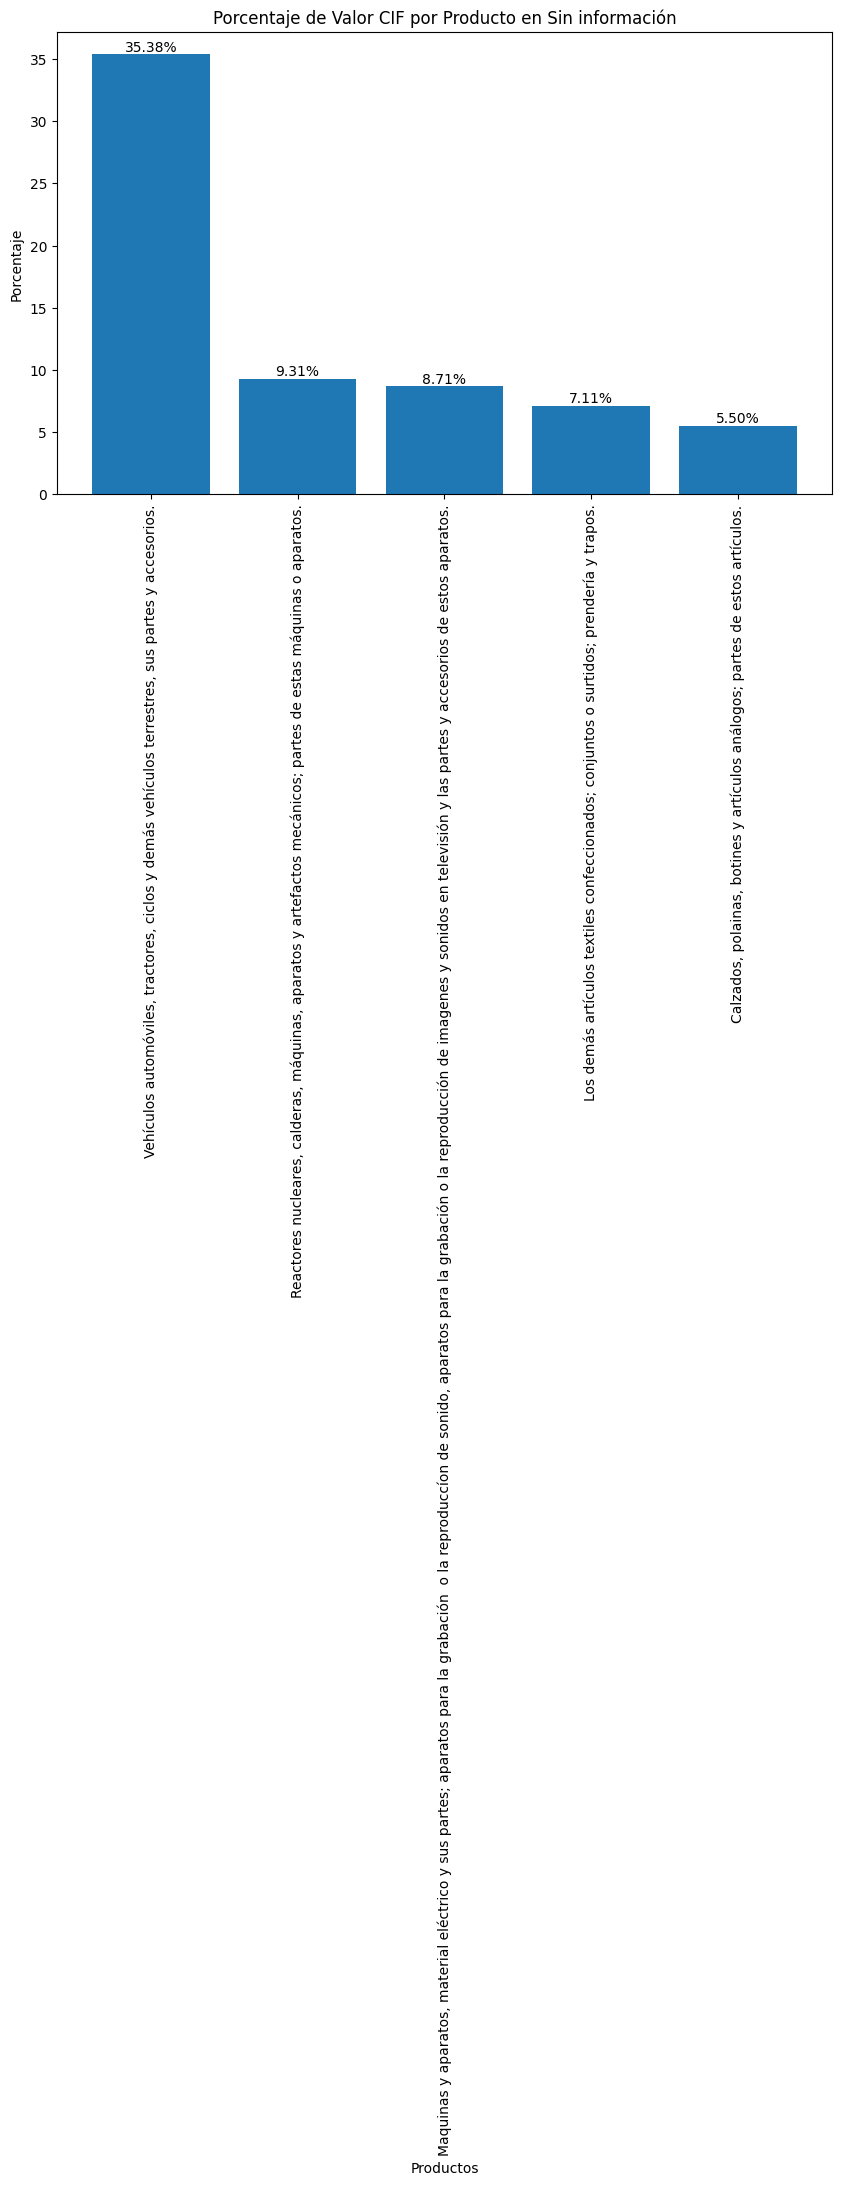

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Agrupación por Provincia y Descripción de Productos
df_grouped = df.groupby(['Provincia_Ubicacion', 'Capitulo_desc_SA'])['Valor_CIF_USD'].sum().reset_index()

# Calcular el Porcentaje de la Suma Total por Provincia
df_grouped['Porcentaje'] = (df_grouped['Valor_CIF_USD'] / df_grouped.groupby('Provincia_Ubicacion')['Valor_CIF_USD'].transform('sum')) * 100

# Crear DataFrames separados para cada provincia y graficar los porcentajes de los primeros 5 productos
provincias = df['Provincia_Ubicacion'].unique()  # Lista de provincias únicas

for provincia in provincias:
    # Filtrar los datos solo para la provincia actual
    df_provincia_actual = df_grouped[df_grouped['Provincia_Ubicacion'] == provincia]
    
    # Ordenar por porcentaje de mayor a menor y seleccionar los primeros 5 productos
    df_provincia_actual_sorted = df_provincia_actual.sort_values('Porcentaje', ascending=False).head(5)
    
    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    bars = plt.bar(df_provincia_actual_sorted['Capitulo_desc_SA'], df_provincia_actual_sorted['Porcentaje'])
    
    # Rotar los nombres de las etiquetas del eje X a vertical
    plt.xticks(rotation=90)
    
    # Personalizar el gráfico
    plt.ylabel('Porcentaje')
    plt.xlabel('Productos')
    plt.title(f'Porcentaje de Valor CIF por Producto en {provincia}')
    
    # Agregar etiquetas de porcentaje en cada barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f"{yval:.2f}%", ha='center', va='bottom')
    
    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()